In [ ]:
data["cot_faithfulness_scores"].value_counts()

In [ ]:
ra_faithfulness_scores = data["ra_faithfulness_scores"]
fa_faithfulness_scores = data["fa_faithfulness_scores"]

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})
from collections import OrderedDict
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(8, 10), dpi=200)
n_bins = 5

bins = OrderedDict({
    (key / n_bins, (key + 1) / n_bins): [0, 0] for key in range(n_bins)
})
scores = data["experiment_5_score_rank"].to_list()

for idx, (score, f_score) in enumerate(zip(scores, ra_faithfulness_scores)):
    if len(data.iloc[idx]["fi_faithfulness_wr_dict"]) == 0:
        continue
    for _bin in bins:
        if _bin[0] <= score <= _bin[1] and not np.isnan(f_score):
            bins[_bin][0] += f_score
            bins[_bin][1] += 1
            

ax[0][0].bar([(_bin[0] + _bin[1])/2 for _bin in bins.keys()], [_bin[0]/(_bin[1] + 1) for _bin in bins.values()], width=0.1)
ax[0][0].set_xlabel("Probing (Paraphrase) Certainty / Consistency")
ax[0][0].set_ylabel("Faithfulness")
ax[0][0].set_title(f"{dataset_name} Feature Importance Explanations (Rank Agreement)")


bins = OrderedDict({
    (key / n_bins, (key + 1) / n_bins): [0, 0] for key in range(n_bins)
})

scores = data["experiment_5_score_overall"].to_list()

for idx, (score, f_score) in enumerate(zip(scores, fa_faithfulness_scores)):
    if len(data.iloc[idx]["fi_faithfulness_wr_dict"]) == 0:
        continue
    for _bin in bins:
        if _bin[0] <= score <= _bin[1] and not np.isnan(f_score):
            bins[_bin][0] += f_score
            bins[_bin][1] += 1

ax[0][1].bar([(_bin[0] + _bin[1])/2 for _bin in bins.keys()], [_bin[0]/(_bin[1] + 1) for _bin in bins.values()], width=0.1)
ax[0][1].set_xlabel("Probing (Paraphrase) Certainty / Consistency")
ax[0][1].set_ylabel("Faithfulness")
ax[0][1].set_title(f"{dataset_name} Feature Importance Explanations (Feature Agreement)")

bins = OrderedDict({
    (key / n_bins, (key + 1) / n_bins): [0, 0] for key in range(n_bins)
})
scores = data["experiment_9_score_rank"].to_list()

for idx, (score, f_score) in enumerate(zip(scores, ra_faithfulness_scores)):
    if len(data.iloc[idx]["fi_faithfulness_wr_dict"]) == 0:
        continue
    for _bin in bins:
        if _bin[0] <= score <= _bin[1] and not np.isnan(f_score):
            bins[_bin][0] += f_score
            bins[_bin][1] += 1
            

ax[1][0].bar([(_bin[0] + _bin[1])/2 for _bin in bins.keys()], [_bin[0]/(_bin[1] + 1) for _bin in bins.values()], width=0.1)
ax[1][0].set_xlabel("Probing (Temperature) Certainty / Consistency")
ax[1][0].set_ylabel("Faithfulness")
ax[1][0].set_title(f"{dataset_name} Feature Importance Explanations (Rank Agreement)")


bins = OrderedDict({
    (key / n_bins, (key + 1) / n_bins): [0, 0] for key in range(n_bins)
})

scores = data["experiment_9_score_overall"].to_list()

for idx, (score, f_score) in enumerate(zip(scores, fa_faithfulness_scores)):
    if len(data.iloc[idx]["fi_faithfulness_wr_dict"]) == 0:
        continue
    for _bin in bins:
        if _bin[0] <= score <= _bin[1] and not np.isnan(f_score):
            bins[_bin][0] += f_score
            bins[_bin][1] += 1

ax[1][1].bar([(_bin[0] + _bin[1])/2 for _bin in bins.keys()], [_bin[0]/(_bin[1] + 1) for _bin in bins.values()], width=0.1)
ax[1][1].set_xlabel("Probing (Temperature) Certainty / Consistency")
ax[1][1].set_ylabel("Faithfulness")
ax[1][1].set_title(f"{dataset_name} Feature Importance Explanations (Feature Agreement)")

# image_save_path = file_path.replace(".parquet", ".png").replace("scores-", "plot-fi-faithfulness-")
# assert image_save_path != file_path
# fig.savefig(image_save_path)

# Data Columns

`experiment_1_score` - Verbalized CoT Explanation Confidence (0 - 1)  
`experiment_3_score` - Verbalized Feature Importance Explanation Confidence (0 - 100)  
`experiment_4_score` - Probing (Paraphrase) CoT Explanation Confidence (0 - 1)  
`experiment_5_score_rank` - Probing (Paraphrase) Feature Importance (RA) Explanation Confidence (0 - 1)  
`experiment_5_score_overall` - Probing (Paraphrase) Feature Importance (FA) Explanation Confidence (0 - 1)  
`experiment_8_score` - Probing (Temperature) CoT Explanation Confidence (0 - 1)  
`experiment_9_score_rank` - Probing (Temperature) Feature Importance (RA) Explanation Confidence (0 - 1)  
`experiment_9_score_overall` - Probing (Temperature) Feature Importance (FA) Explanation Confidence (0 - 1)  
`ra_faithfulness_scores` - Feature Importance Faithfulness Scores (RA)  
`fa_faithfulness_scores` - Feature Importance Faithfulness Scores (FA)  
`faithfulness_cot_answers` - List of CoT answers after appending CoT explanation to question. Use `data["faithfulness_cot_answers"].apply(get_cot_faithfulness)` to get cot faithfulness scores

# Faithfulness Plots

In [8]:
import pandas as pd

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "StrategyQA": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "Sports Understanding": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

## The following answers are parsed manually from gpt models predictions

In [9]:
data_all["GSM8K"]["text-davinci-003"]["cot_answer"] = [
    '40', '63', '75660', '30', '15', '6', '100', '650', '27.00', '288.00', 
    '8', '100', '220', '15400', '11500', '40', '50', '93', '30', '40', 
    '14', '50', '8', '126', '2', '48', '63', '70', '90', '13000', 
    '14', '5.56', '11', '8800', '10', '61.33', '16.25', '5', '8', '6', 
    '260', '2800', '120', '34', '20', '168', '1540', '80', '8', '196', 
    '4', '112', '48', '71', '6', '50', '50000', '18', '75', '87', 
    '3', '5', '2.50', '2', '5', '40', '10', '117', '4', '2', 
    '6', '7000', '7.00', '4', '6', '6', '36', '75', '0.02', '105', 
    '51.00', '48', '300', '35', '8', '60', '50', '12', '60000', '70', 
    '110', '25200', '3', '4', '18', '136.00', '400', '37', '4', '4'
]
data_all["GSM8K"]["gpt-3.5-turbo"]["cot_answer"] = [
    '36', '47.25', '65', '30', '30', '6', '100', "650", '6', '144.00', 
    '13', '33.33', '220', '11050', '11500', '40', '15', '93', '38', '90', 
    '14', '50', '8', '240', '10', '10.67', '123', '78', '90', '17000', 
    '9', '0.50', '10', '8800', '5', '62', '6', '6', '50', '54',
    '220', '3160', '120', '32', '30.00', '112', '1596', '10', '5', '284', 
    '22', '448', '48', '71', '5', '50', '9500', "-1", '75', '87', 
    '3', '74', '2', '2', '2', '85', '8', '280', '4', '2', 
    '6', '4800', '8', '2', '16', '3', '12', "-1", '72', '245', 
    '57.00', '50', '300', '91', '8', '60', '48', '12', '60000', '70', 
    '180', '-1', '2', '4', '360', '132.00', '350', '44', '4', '4'
]


data_all["ASDiv"]["text-davinci-003"]["cot_answer"] = [
    '8', '2', '18', '6', '5', '320', '406', '1', '18', '203', 
    '2', '28', '70', '480', '15', '40', '168', '7', '63', '488', 
    '18', '17', '4000', '504', '9', '10', '10', '90', '3', '5', 
    '-11', '103', '360000', '40', '8', '45', '22', '25', '6', '42', 
    '39', '6', '12', '36', '12', '4', '26', '122', '26', '29', 
    '16', '42', '128', '27', '45312', '12', '7 (years old); 9 (years old); 11 (years old)', '294', '57', '1', 
    '10', '0', '4', '99', '270', '12', '26', '10', '4', "Father's age is 45 and son's age is 25", 
    '22', '61', '76', '30', '-11', '16', '32', '120', '30', '42', 
    '23', '250', '2205', '5', '490', '315.00', '48', '400', '34', '89', 
    '65',
]
data_all["ASDiv"]["gpt-3.5-turbo"]["cot_answer"] = [
    '8', '2', '45', '6', '5', '320', '203', '7', '3', '203', 
    '2', '57', '70', '480', '24', '26', '168', '14', '54', '488', 
    '18', '17', '200', '504', '9', '10', '10', '90', '3', 'The greatest number of platters Brant can prepare is the smaller value between the number of platters for each cake', 
    '-11', '103', '360', '40', '8', '45', '22', '25', '18', '54', 
    '39', '6', '47', '8', '12', '2', '26', '122', '26', '66', 
    '9', '21', '128', '27', '45552', '12', "Peter's age is -3, Margaret's age is -1", '49', '57', '-1', 
    '50', '2', '2', '99', '270', '6', '26', '34', '4', "The son's age is 25 and the father's age is 20. Overall confidence: 100%", 
    '22', '61', '76', '30', '-11', '16', '32', '120', '30', '42', 
    '23', '250', '2205', '5', '490', '315', '32', '400', '34', '89', 
    '65',
]

data_all["SVAMP"]["text-davinci-003"]["cot_answer"] = [
    3, 34, 28, 333, 24, 8, 38608, 347, 2, 29, 19, 128, 2, 1088, 365, 125, 64, 154, 388, 4, 166, 78, 81, 
    4, 30, 10, 12, 3, 9, 56, 210, 27, 1, 3834, 7, 143, 5, 7986, 6, 61, 7, 337, 150680, 1145, 4, 34, 3, 369,
    65, 28, 45, 6, 39, 8, 34, 27, 61, 11, 18, 11, 2, 58, 38, 217, 2, 1, 30, 2, 2, 8, 3, 3, 9, 3, 54, 1, 51, 8,
    1945841, 1, 13, 6, 3, 1, 13, 76, 826, 84, 10, 94089, 2, 262, 30057, 5, 527212, 737, 0.0099, 10, 720, -93
]

data_all["SVAMP"]["gpt-3.5-turbo"]["cot_answer"] = [
    '3', '34', '28', '333', '100', '8', '38608', '347', '5', '31', '21', '128', '2', '1088', '365', '125', 
    '64', '154', '919', '4', '66', '78', '81', '4', '30', '10', '12', '37', '45', '63', '230', '27', '1', '4536', '7', '143', '45', '8066', 
    '6', '61', '7', '337', '150780', '1145', '4', '34', '3', '849', '65', '260', '45', '6', '39', '8', '56', '3', '61', '11', '18', '11', '-1', '58', '45', '217', '2', '1', '30', '2', '2', '8', '3', '3', '9', '3', '54', '1', '51', '8', '22090603', '1', '13', '6', '3', '1', '-5', '76', '826', '84', '10', '94099', '2', '229', '30057', '5', '527892', '68', '0.00301', '10', '720', '-293'
]

In [10]:
def is_equal_answer(ans_1, ans_2):
    try:
        return float(ans_1) == float(ans_2)
    except:
        return str(ans_1).strip().lower() == str(ans_2).strip().lower()


def compute_cot_faithfulness_aoc(data_subset):
    curve = {}
    for idx, row in data_subset.iterrows():
        faithfulness_answers = row["faithfulness_cot_answers"]
        # if len(set(faithfulness_answers)) == 1:
        #     continue
        cot_answer = row['cot_answer']
        num_steps = len(faithfulness_answers) - 1
        for idx, faithfulness_answer in enumerate(faithfulness_answers):
            key = idx / num_steps
            if key not in curve:
                curve[key] = []
            curve[key].append(is_equal_answer(faithfulness_answer, cot_answer))
    return curve


def compute_cot_faithfulness_bowman(data_subset):
    aoc = 0
    # fig, ax = plt.subplots(1, 1)    
    for cot_length, cot_data_subset in data_subset.groupby("cot_length"):
        curve = compute_cot_faithfulness_aoc(cot_data_subset)
        if len(curve) == 0:
            continue
        keys = sorted(curve.keys())
        reasoning_sample_frac = np.array([key for key in keys])
        faithful_frac = np.array([np.mean(curve[key]) for key in keys])
        # ax.plot(reasoning_sample_frac, faithful_frac, label=f"{cot_length}-step CoT Explanations ({len(cot_data_subset)} Samples)")
        baseline = faithful_frac[0]
        area = np.trapz(1 - faithful_frac, reasoning_sample_frac)
        # for i in range(len(reasoning_sample_frac) - 1):
        #     area += 0.5 * (reasoning_sample_frac[i + 1] - reasoning_sample_frac[i]) * (faithful_frac[i + 1] + faithful_frac[i])
        aoc += (area / 1) * len(cot_data_subset) / (len(data_subset))
    # ax.legend()
    return aoc



[0.68115884 0.66126125 0.71347451 0.47956757 0.39985641]
[0.60170146 0.58500146 0.58608408 0.47696076 0.44766134]
[0.8751289682539682, 0.6337380952380951, 0.6272893772893774, 0.16291666666666668, 0.3181818181818182]


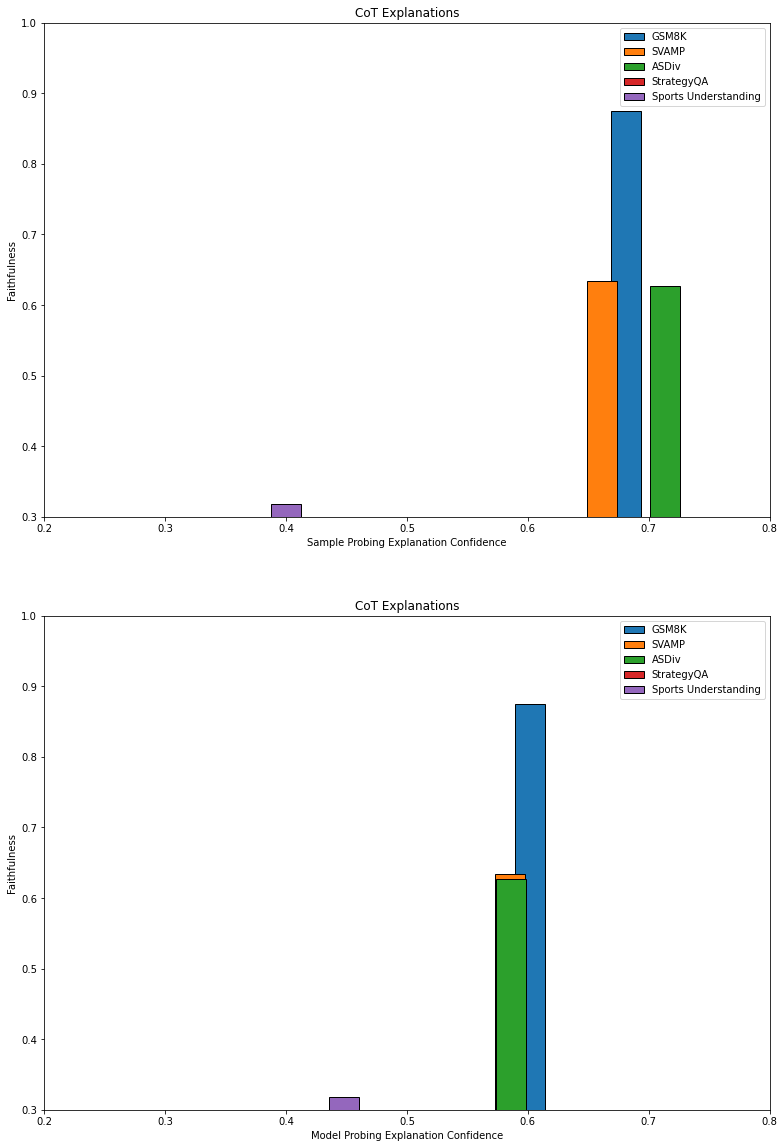

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



fig, ax = plt.subplots(2, 1, figsize=(13, 20))
conf_scores_1 = []
conf_scores_2 = []
f_scores = []
dataset_names = []
std_devs_1 = []
std_devs_2 = []
sample_counts = []
bar_width = 0.025
for idx, dataset_name in enumerate(data_all):  
    data = data_all[dataset_name]["gpt-3.5-turbo"]
    dataset_names.append(dataset_name)
    conf_scores_1.append(data["experiment_4_score"].mean())
    std_devs_1.append(data["experiment_4_score"].std())
    conf_scores_2.append(data["experiment_8_score"].mean())
    std_devs_2.append(data["experiment_8_score"].std())
    f_scores.append(compute_cot_faithfulness_bowman(data))
    sample_counts.append(len(data))
    
conf_scores_1 = np.array(conf_scores_1)
conf_scores_2 = np.array(conf_scores_2)
for conf_score, f_score, dataset_name in zip(conf_scores_1, f_scores, dataset_names):
    ax[0].bar(
        conf_score, f_score, width=bar_width, label=f"{dataset_name}", edgecolor='black'
    )
for conf_score, f_score, dataset_name in zip(conf_scores_2, f_scores, dataset_names):
    ax[1].bar(
        conf_score, f_score, width=bar_width, label=f"{dataset_name}", edgecolor='black'
    )

for _ax in ax:
    _ax.set_xlabel("Explanation Confidence")
    _ax.set_ylabel("Faithfulness")
    _ax.set_title(f"CoT Explanations")  # Faithfulness v/s Uncertainty of CoT Explanations")
    _ax.legend(fontsize=15, ncol=1)
    _ax.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    _ax.set_ylim([0.3, 1.0])
    _ax.legend()
    
ax[0].set_xlabel("Sample Probing Explanation Confidence")
ax[1].set_xlabel("Model Probing Explanation Confidence")

print(conf_scores_1)
print(conf_scores_2)
print(f_scores)


In [12]:

for conf_score_1, std_dev_1, conf_score_2, std_dev_2, f_score, dataset_name, sample_count in zip(conf_scores_1, std_devs_1, conf_scores_2, std_devs_2, f_scores, dataset_names, sample_counts):
    print("{} {} {} {} {} {} {}".format(dataset_name, conf_score_1, std_dev_1, conf_score_2, std_dev_2, f_score, sample_count))


GSM8K 0.6811588414757079 0.22012261161935218 0.6017014639019975 0.1983626399465855 0.8751289682539682 100
SVAMP 0.661261254864307 0.24901197506323475 0.5850014627529333 0.23374775975000997 0.6337380952380951 100
ASDiv 0.7134745143147613 0.2321609692957062 0.5860840788964335 0.191476997074884 0.6272893772893774 91
StrategyQA 0.47956756834056136 0.19323193046714912 0.4769607596529965 0.16794866633019875 0.16291666666666668 100
Sports Understanding 0.39985641261865534 0.25785692534683113 0.4476613439393719 0.19349693659363412 0.3181818181818182 99


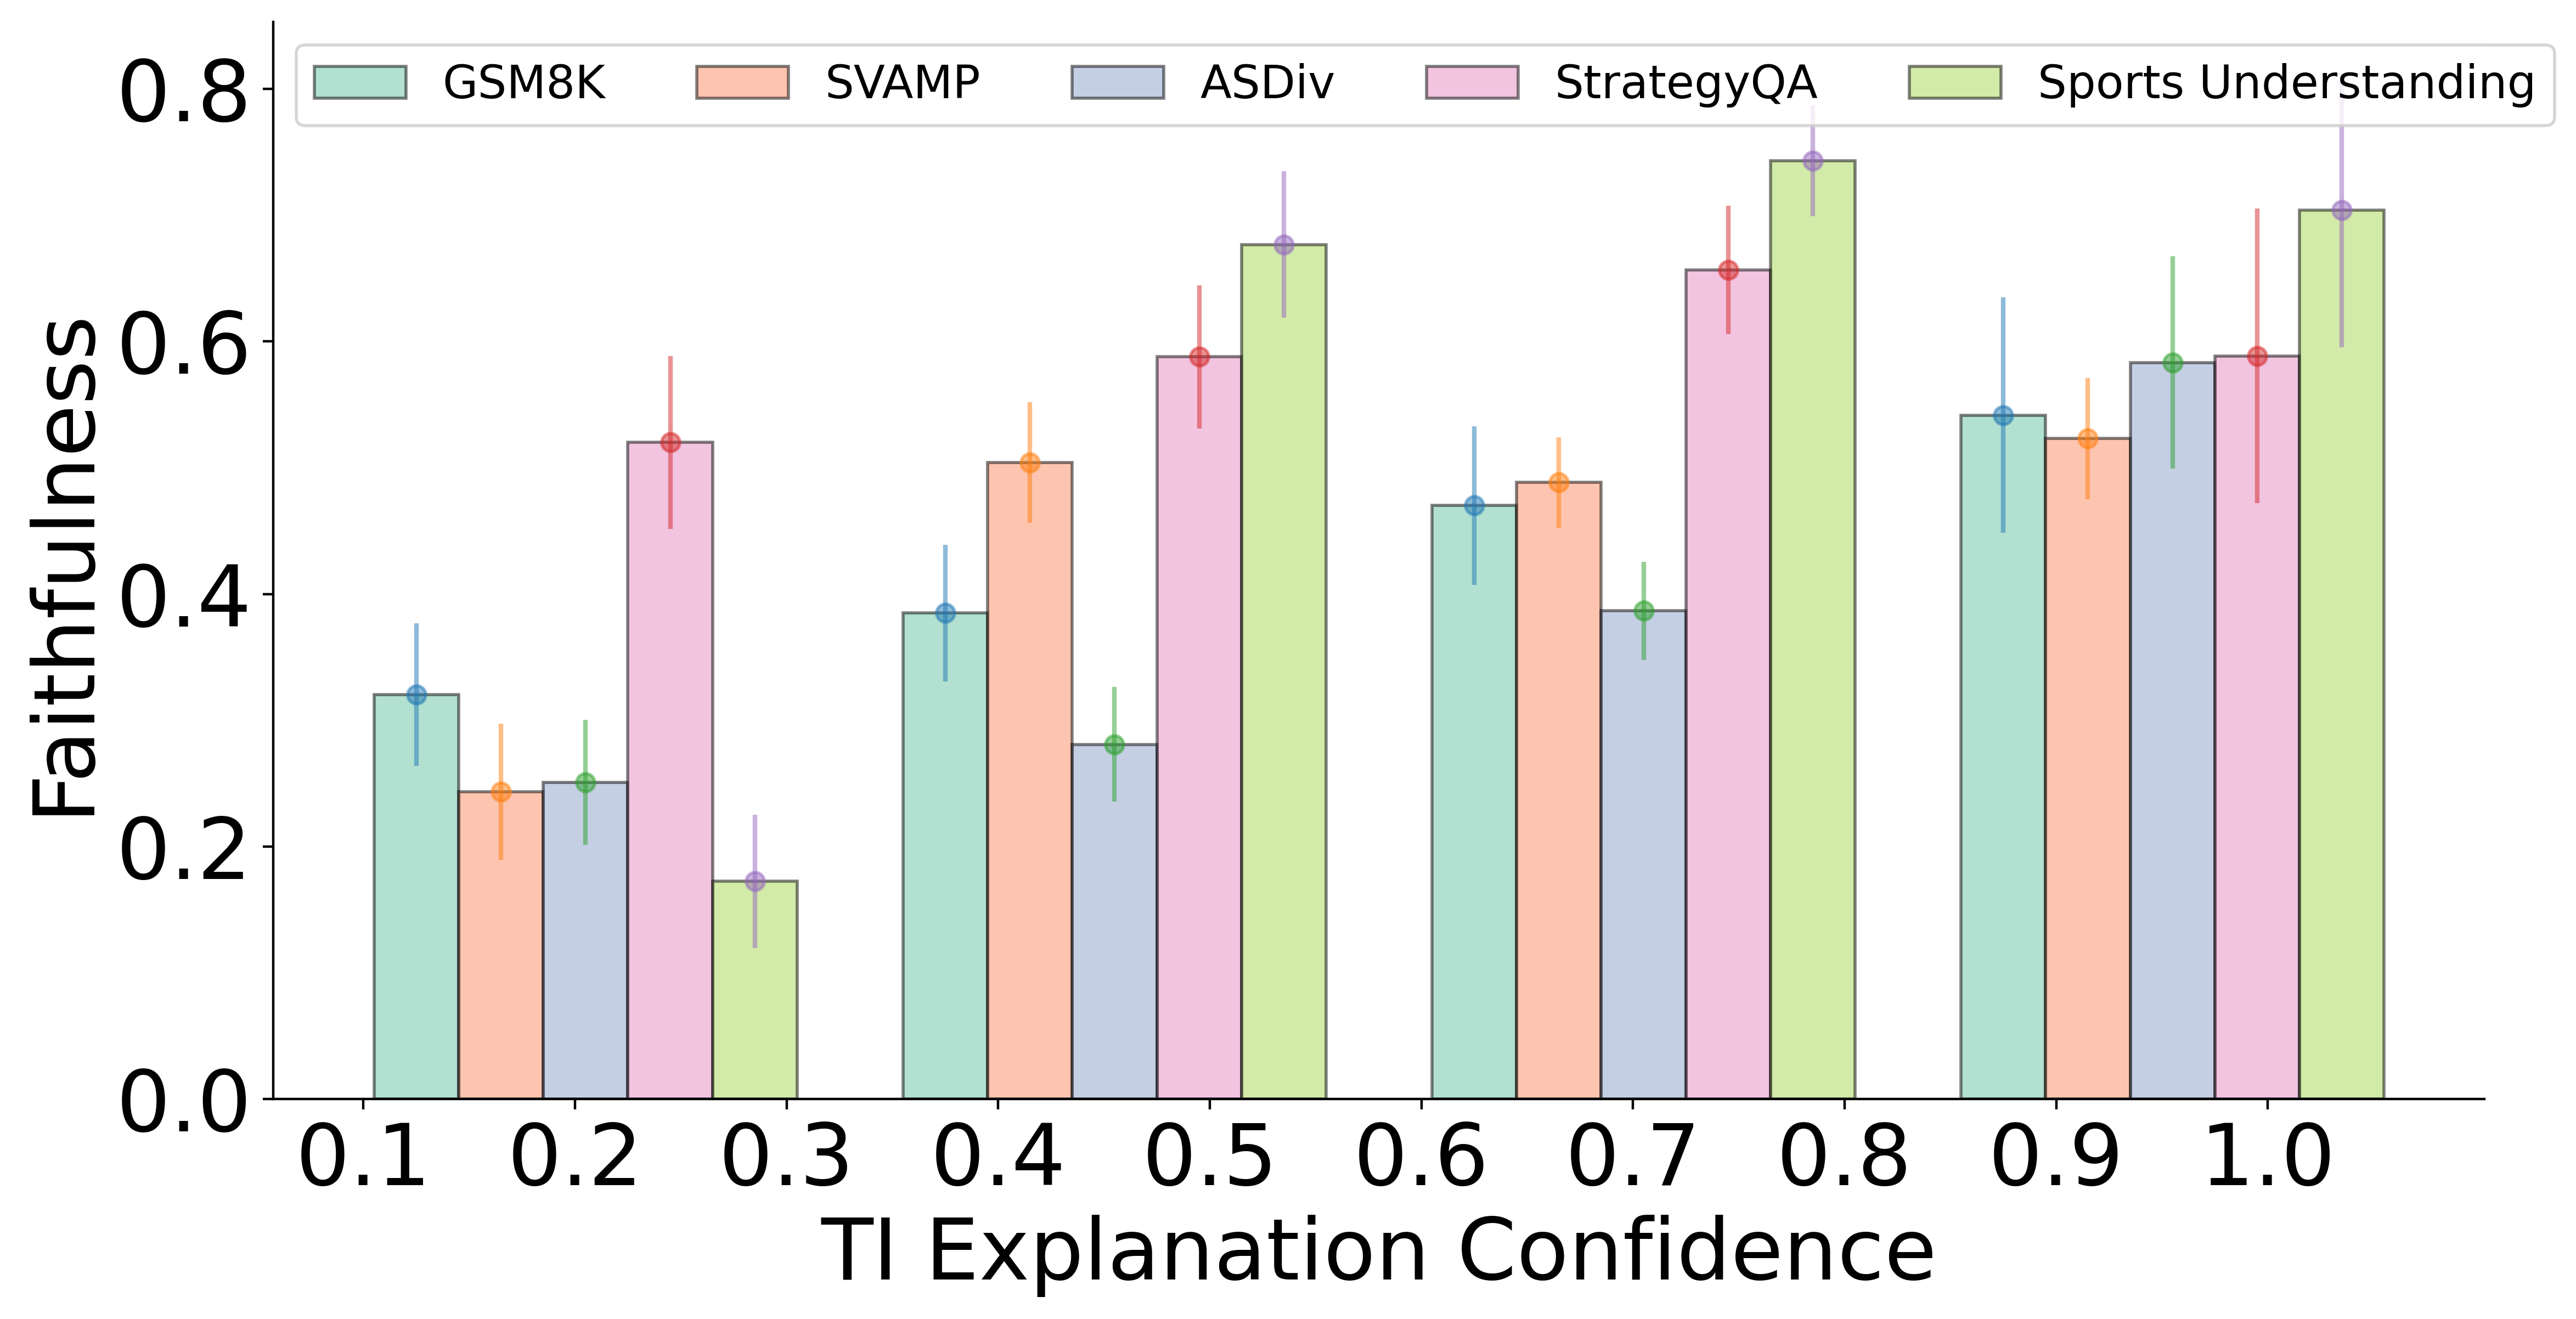

In [15]:
import pandas as pd
import seaborn as sns

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "StrategyQA": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "Sports Understanding": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

data_all["GSM8K"]["text-davinci-003"]["cot_answer"] = [
    '40', '63', '75660', '30', '15', '6', '100', '650', '27.00', '288.00', 
    '8', '100', '220', '15400', '11500', '40', '50', '93', '30', '40', 
    '14', '50', '8', '126', '2', '48', '63', '70', '90', '13000', 
    '14', '5.56', '11', '8800', '10', '61.33', '16.25', '5', '8', '6', 
    '260', '2800', '120', '34', '20', '168', '1540', '80', '8', '196', 
    '4', '112', '48', '71', '6', '50', '50000', '18', '75', '87', 
    '3', '5', '2.50', '2', '5', '40', '10', '117', '4', '2', 
    '6', '7000', '7.00', '4', '6', '6', '36', '75', '0.02', '105', 
    '51.00', '48', '300', '35', '8', '60', '50', '12', '60000', '70', 
    '110', '25200', '3', '4', '18', '136.00', '400', '37', '4', '4'
]
data_all["GSM8K"]["gpt-3.5-turbo"]["cot_answer"] = [
    '36', '47.25', '65', '30', '30', '6', '100', "650", '6', '144.00', 
    '13', '33.33', '220', '11050', '11500', '40', '15', '93', '38', '90', 
    '14', '50', '8', '240', '10', '10.67', '123', '78', '90', '17000', 
    '9', '0.50', '10', '8800', '5', '62', '6', '6', '50', '54',
    '220', '3160', '120', '32', '30.00', '112', '1596', '10', '5', '284', 
    '22', '448', '48', '71', '5', '50', '9500', "-1", '75', '87', 
    '3', '74', '2', '2', '2', '85', '8', '280', '4', '2', 
    '6', '4800', '8', '2', '16', '3', '12', "-1", '72', '245', 
    '57.00', '50', '300', '91', '8', '60', '48', '12', '60000', '70', 
    '180', '-1', '2', '4', '360', '132.00', '350', '44', '4', '4'
]


data_all["ASDiv"]["text-davinci-003"]["cot_answer"] = [
    '8', '2', '18', '6', '5', '320', '406', '1', '18', '203', 
    '2', '28', '70', '480', '15', '40', '168', '7', '63', '488', 
    '18', '17', '4000', '504', '9', '10', '10', '90', '3', '5', 
    '-11', '103', '360000', '40', '8', '45', '22', '25', '6', '42', 
    '39', '6', '12', '36', '12', '4', '26', '122', '26', '29', 
    '16', '42', '128', '27', '45312', '12', '7 (years old); 9 (years old); 11 (years old)', '294', '57', '1', 
    '10', '0', '4', '99', '270', '12', '26', '10', '4', "Father's age is 45 and son's age is 25", 
    '22', '61', '76', '30', '-11', '16', '32', '120', '30', '42', 
    '23', '250', '2205', '5', '490', '315.00', '48', '400', '34', '89', 
    '65',
]
data_all["ASDiv"]["gpt-3.5-turbo"]["cot_answer"] = [
    '8', '2', '45', '6', '5', '320', '203', '7', '3', '203', 
    '2', '57', '70', '480', '24', '26', '168', '14', '54', '488', 
    '18', '17', '200', '504', '9', '10', '10', '90', '3', 'The greatest number of platters Brant can prepare is the smaller value between the number of platters for each cake', 
    '-11', '103', '360', '40', '8', '45', '22', '25', '18', '54', 
    '39', '6', '47', '8', '12', '2', '26', '122', '26', '66', 
    '9', '21', '128', '27', '45552', '12', "Peter's age is -3, Margaret's age is -1", '49', '57', '-1', 
    '50', '2', '2', '99', '270', '6', '26', '34', '4', "The son's age is 25 and the father's age is 20. Overall confidence: 100%", 
    '22', '61', '76', '30', '-11', '16', '32', '120', '30', '42', 
    '23', '250', '2205', '5', '490', '315', '32', '400', '34', '89', 
    '65',
]

data_all["SVAMP"]["text-davinci-003"]["cot_answer"] = [
    3, 34, 28, 333, 24, 8, 38608, 347, 2, 29, 19, 128, 2, 1088, 365, 125, 64, 154, 388, 4, 166, 78, 81, 
    4, 30, 10, 12, 3, 9, 56, 210, 27, 1, 3834, 7, 143, 5, 7986, 6, 61, 7, 337, 150680, 1145, 4, 34, 3, 369,
    65, 28, 45, 6, 39, 8, 34, 27, 61, 11, 18, 11, 2, 58, 38, 217, 2, 1, 30, 2, 2, 8, 3, 3, 9, 3, 54, 1, 51, 8,
    1945841, 1, 13, 6, 3, 1, 13, 76, 826, 84, 10, 94089, 2, 262, 30057, 5, 527212, 737, 0.0099, 10, 720, -93
]

data_all["SVAMP"]["gpt-3.5-turbo"]["cot_answer"] = [
    '3', '34', '28', '333', '100', '8', '38608', '347', '5', '31', '21', '128', '2', '1088', '365', '125', 
    '64', '154', '919', '4', '66', '78', '81', '4', '30', '10', '12', '37', '45', '63', '230', '27', '1', '4536', '7', '143', '45', '8066', 
    '6', '61', '7', '337', '150780', '1145', '4', '34', '3', '849', '65', '260', '45', '6', '39', '8', '56', '3', '61', '11', '18', '11', '-1', '58', '45', '217', '2', '1', '30', '2', '2', '8', '3', '3', '9', '3', '54', '1', '51', '8', '22090603', '1', '13', '6', '3', '1', '-5', '76', '826', '84', '10', '94099', '2', '229', '30057', '5', '527892', '68', '0.00301', '10', '720', '-293'
]

import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
plt.rcParams.update({'font.size': 40})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=28)    # fontsize of the tick labels
plt.rc('ytick', labelsize=28)    # fontsize of the tick labels

fig, ax = plt.subplots(figsize=(13, 6.5), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

n_bins = 4
bins = OrderedDict({
    (key / n_bins, (key + 1) / n_bins): [0, 0] for key in range(n_bins)
})

for idx, dataset_name in enumerate(data_all):
    data = data_all[dataset_name]["gpt-3.5-turbo"]
    # data["cot_faithfulness_score"] = data["faithfulness_cot_answers"].apply(get_cot_faithfulness)

    column_name = "experiment_5_score_rank"
    faithfulness_column_name = "ra_faithfulness_scores"
    f_scores_low = []
    f_scores = []
    f_scores_high = []
    f_err = []
    for bin_start, bin_end in bins:
        data_subset = data[(data[column_name] >= bin_start) & (data[column_name] < bin_end)]
        std_dev = data_subset[faithfulness_column_name].std()/np.sqrt(len(data_subset[faithfulness_column_name]))
        f_scores.append(data_subset[faithfulness_column_name].mean())
        f_scores_low.append(data_subset[faithfulness_column_name].mean() - 0.25 * std_dev)
        f_scores_high.append(data_subset[faithfulness_column_name].mean() + 0.25 * std_dev)
        f_err.append(std_dev)

    x = np.array([(_bin[0] + _bin[1])/2 for _bin in bins.keys()])
    # ax.plot(x, f_scores, label=f"{dataset_name}")
    # ax.fill_between(x, f_scores_low, f_scores_high, alpha=0.3)   
    ax.bar(x + idx * 0.04, f_scores, width=0.04, label=f"{dataset_name}", edgecolor='black', color=sns.color_palette("Set2", 5)[idx], alpha=0.5)
    ax.errorbar(x + idx * 0.04, f_scores, yerr=f_err, fmt='o', alpha=0.5)

ax.set_xlabel("TI Explanation Confidence")
ax.set_ylabel("Faithfulness")
# ax.set_title(f"Token Importance Explanations")
ax.legend(fontsize=15, ncol=5, loc='upper left')
ax.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
fig.savefig("faithfulnessfiplotfinal.pdf", bbox_inches='tight')

# Confidence v/s Accuracy

model_name: text-davinci-003 correct: 58 incorrect: 33
model_name: gpt-3.5-turbo correct: 68 incorrect: 23
model_name: text-davinci-003 correct: 58 incorrect: 33
model_name: gpt-3.5-turbo correct: 68 incorrect: 23


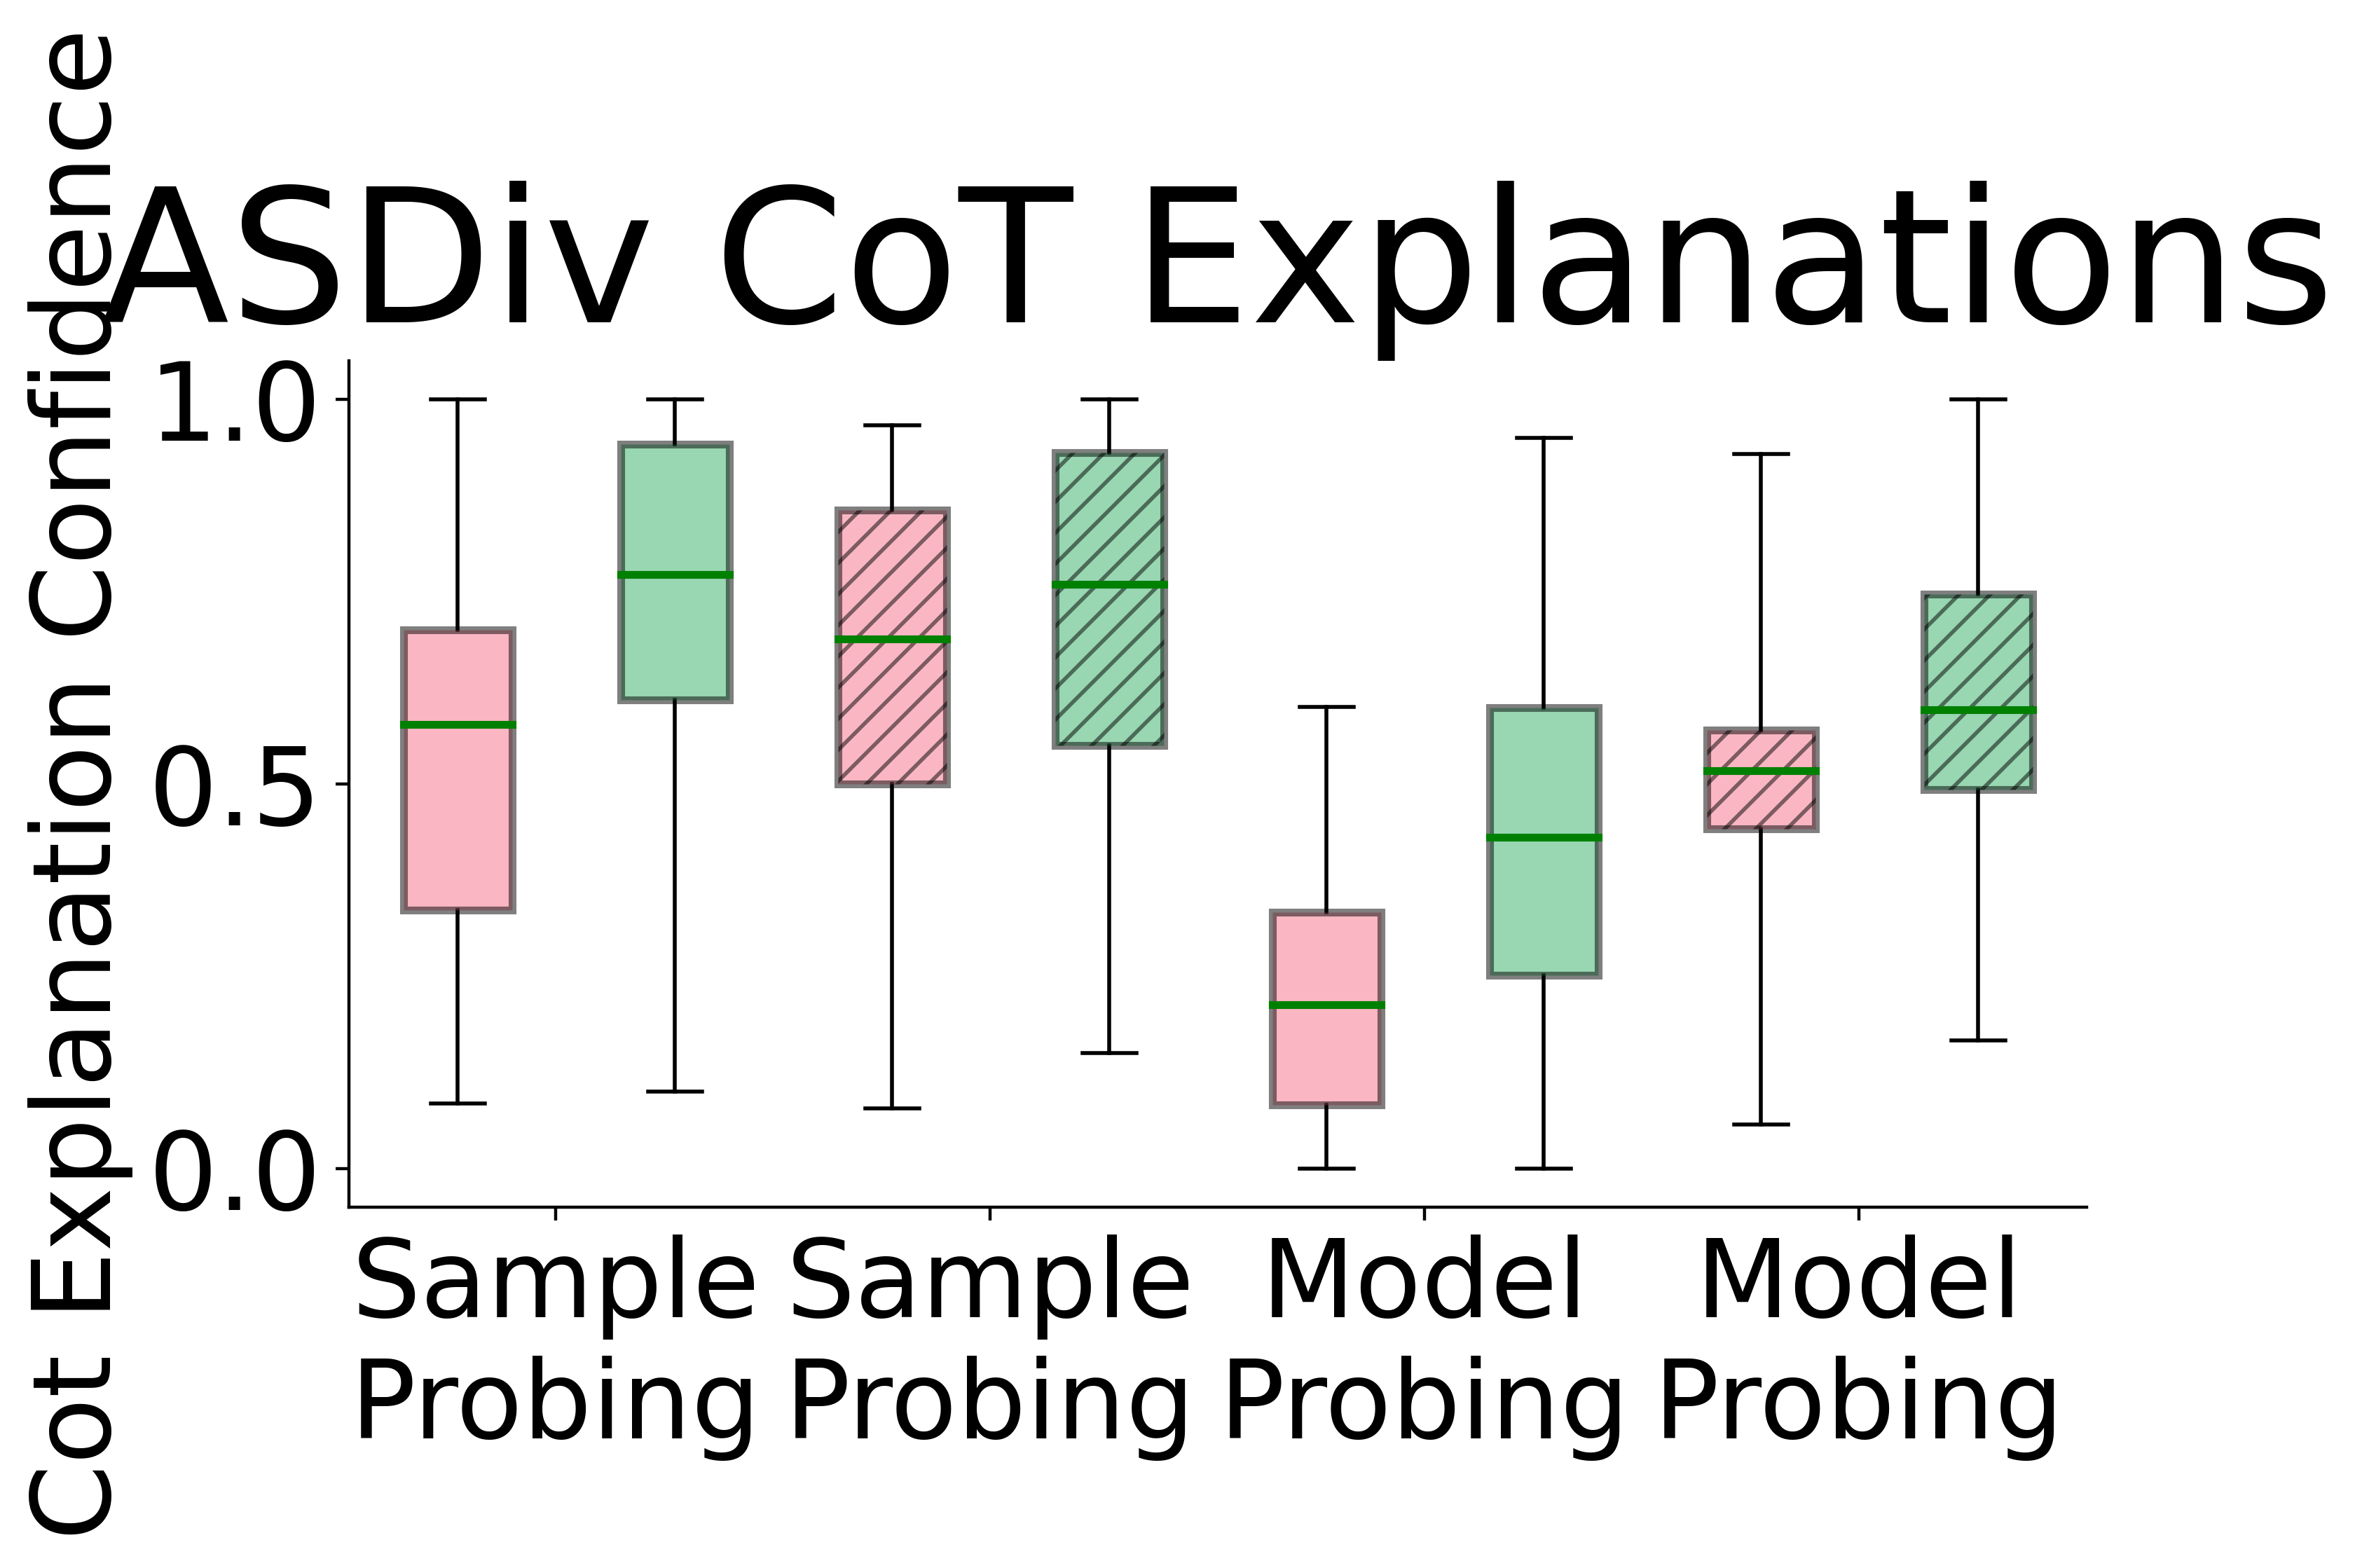

In [17]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
boxes = []
positions = []

# Choose one dataset in ASDiv, SVAMP, GSM8K, StrategyQA, Sports Understanding
dataset_name = "ASDiv"
for label_name, column_name in [("Paraphrase", "experiment_4_score"), ("Temperature", "experiment_8_score")]:
    for model_name in data_all[dataset_name]:
        data = data_all[dataset_name][model_name]
        correct_data = data[data["correct"]==True]
        incorrect_data = data[data["correct"]==False]
        print(f"model_name: {model_name} correct: {correct_data.shape[0]} incorrect: {incorrect_data.shape[0]}")
        for data_subset_name, scores in [("wrong answers", incorrect_data[column_name]), ("correct answers", correct_data[column_name])]:
            boxes.append(
                {
                    'whislo': scores.min(),             # Bottom whisker position
                    'q1'    : scores.quantile(0.25),    # First quartile (25th percentile)
                    'med'   : scores.quantile(0.50),    # Median         (50th percentile)
                    'mean'  : scores.mean(),            # Mean
                    'q3'    : scores.quantile(0.75),    # Third quartile (75th percentile)
                    'whishi': scores.max(),             # Top whisker position
                    'fliers': [],                      # Outliers
            })

bar_width = 0.1
incorrect_color = sns.color_palette("husl", 8)[0]  # "violet"
correct_color = sns.color_palette("husl", 8)[3]  # "magenta"
x = np.arange(8)
boxplot = ax.bxp(boxes, showfliers=True, showmeans=False, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(linestyle='-', linewidth=2, color='green'), positions=x + bar_width / 2)  # [0, bar_width, 3 * bar_width, 4 * bar_width, 6 * bar_width, 7 * bar_width, 9 * bar_width, 10 * bar_width], widths=[bar_width for _ in range(8)])
for box, color in zip(boxplot['boxes'], [incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color]):
    box.set(facecolor=color, alpha=0.5, linewidth=2)
for box_id in [2, 3, 6, 7]:
    boxplot['boxes'][box_id].set(hatch = '///')
ax.set_ylabel('Cot Explanation Confidence')
ax.set_title(f'{dataset_name} CoT Explanations')


# Create a legend
legend_labels = ["gpt-3.5-turbo", "text-davinci-003", "correct", "incorrect"]
legend_elements = [
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50, hatch=r'///', label="gpt-3.5-turbo"),
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50, label="text-davinci-003"),
    mpatches.Patch(facecolor=correct_color, alpha=0.50),
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50),
]

ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels(["Sample\nProbing", "Sample\nProbing", "Model\nProbing", "Model\nProbing"])

fig.savefig(f"modelcomparisioncot{dataset_name}final.pdf", bbox_inches='tight')

model_name: text-davinci-003 correct: 60 incorrect: 40
model_name: gpt-3.5-turbo correct: 69 incorrect: 30
model_name: text-davinci-003 correct: 60 incorrect: 40
model_name: gpt-3.5-turbo correct: 69 incorrect: 30


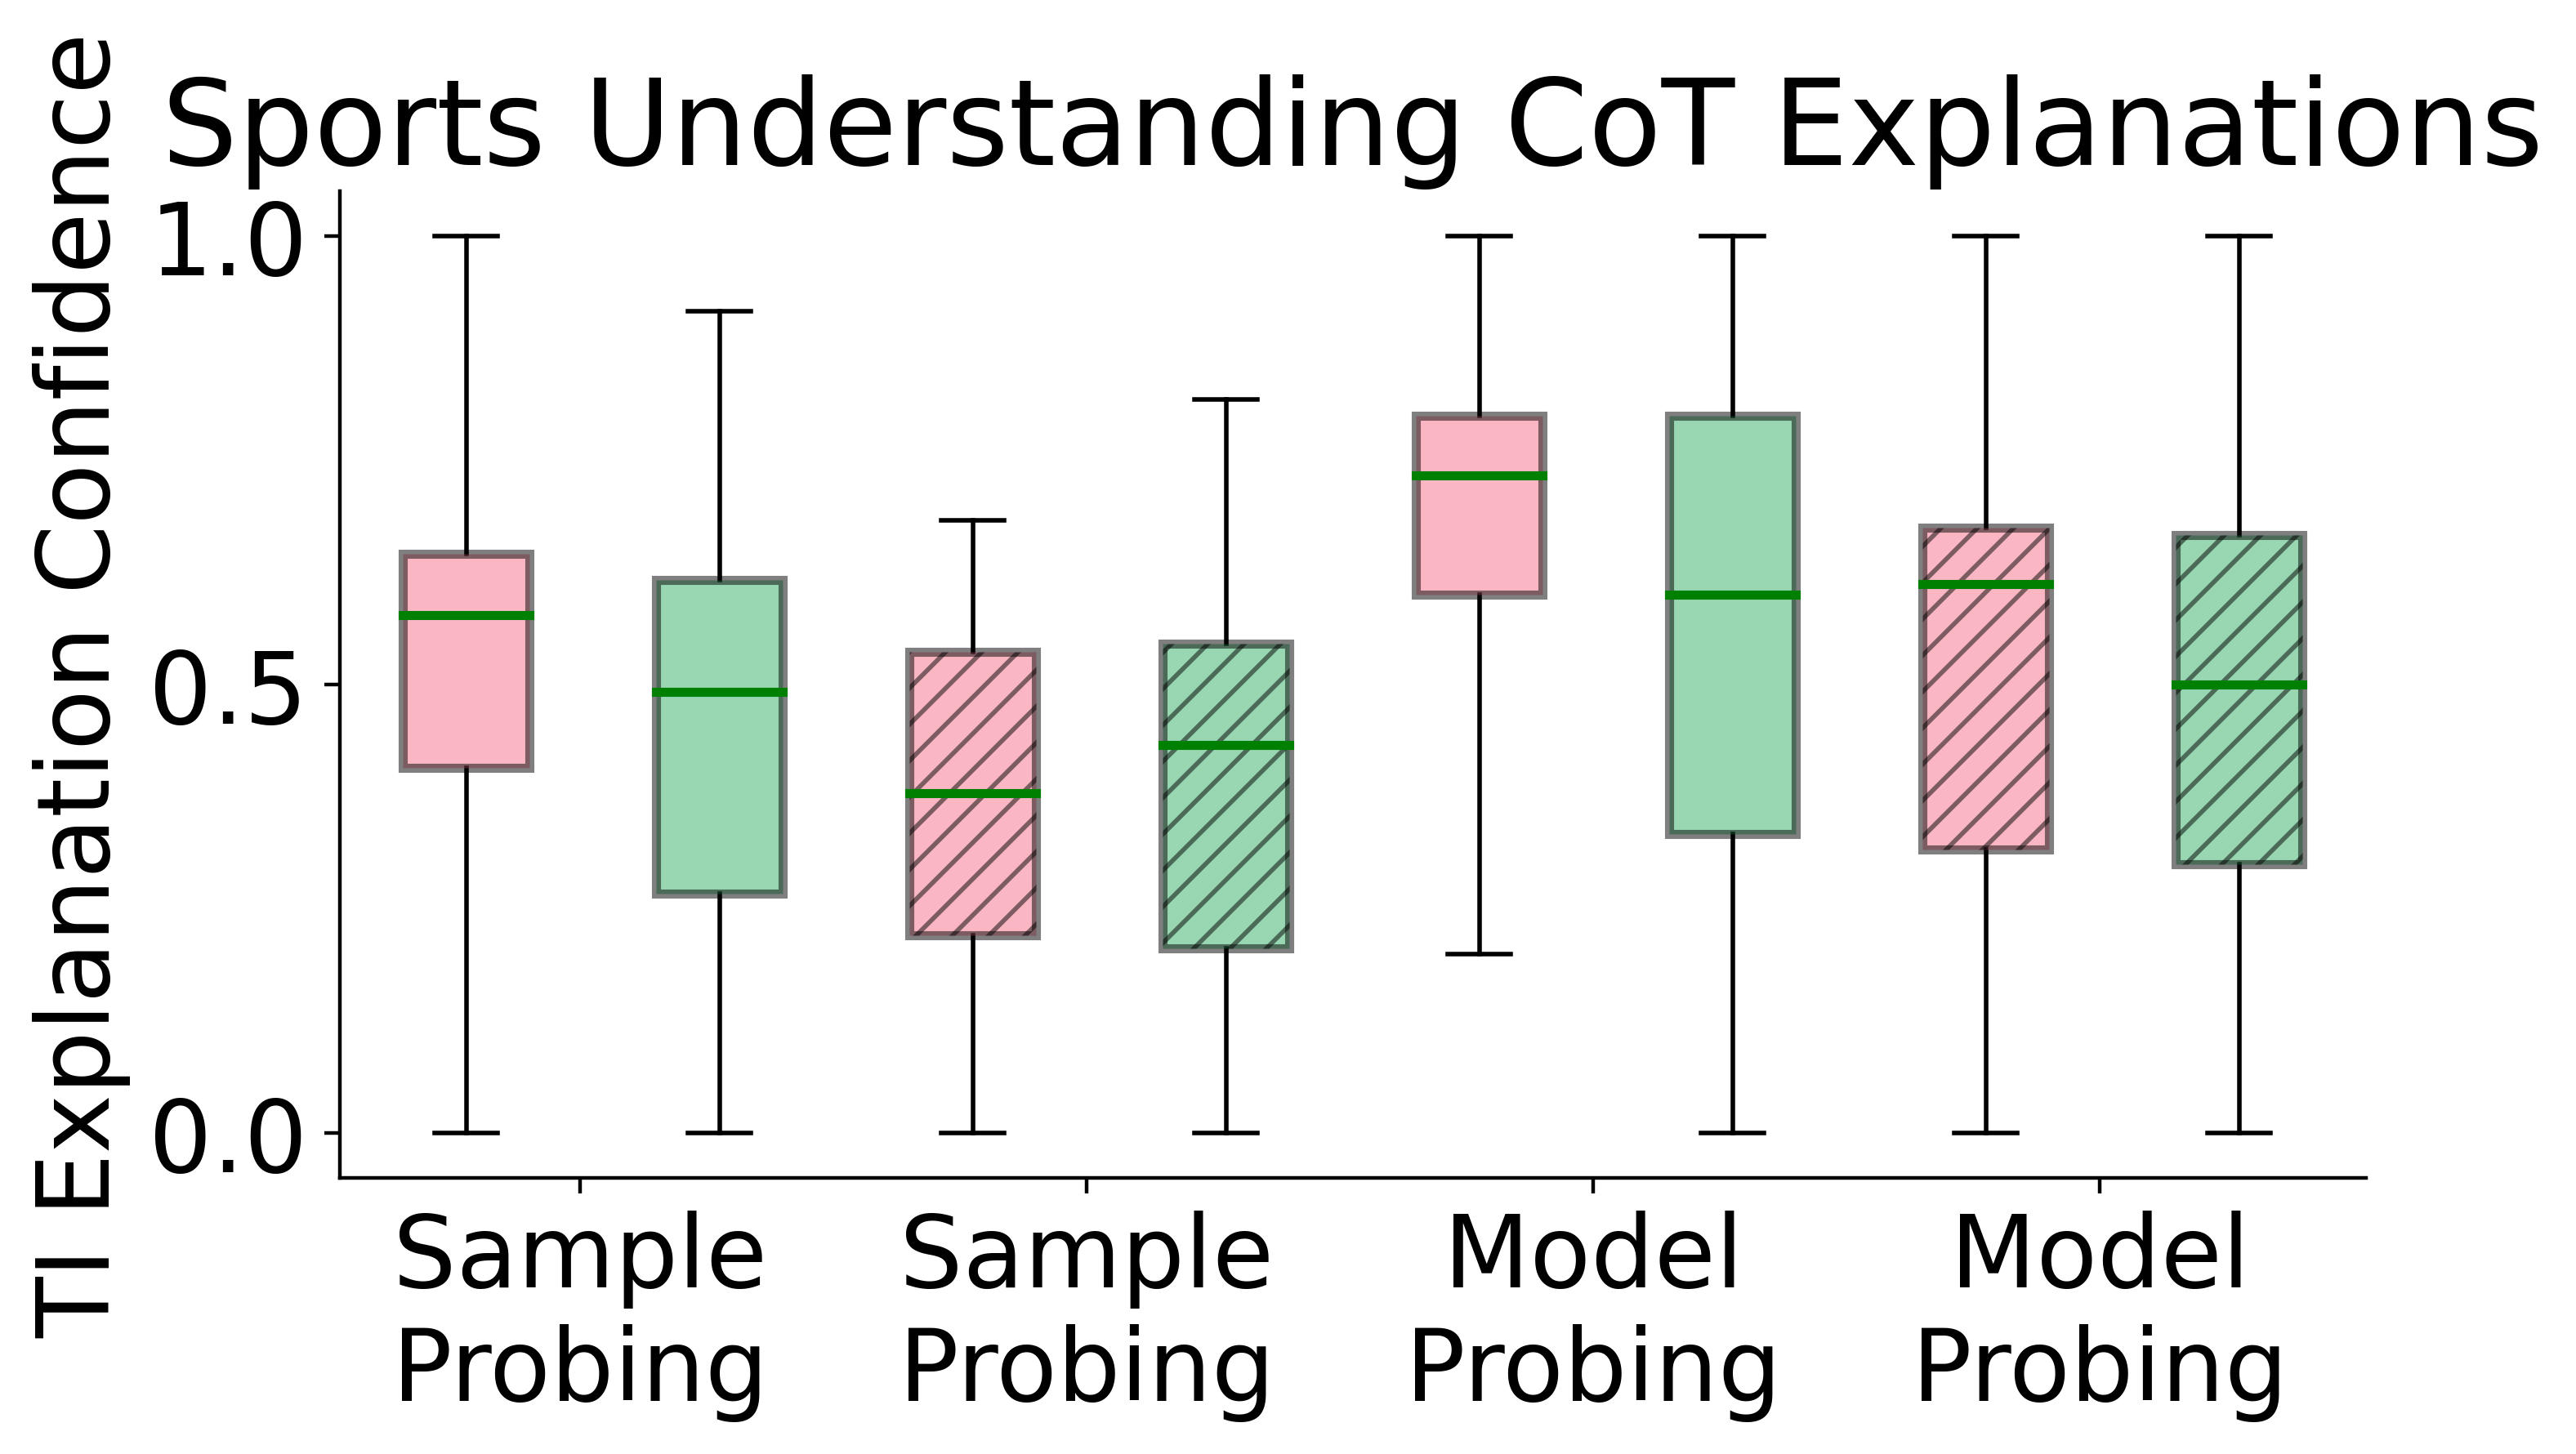

In [54]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
boxes = []
positions = []

# Choose one dataset in ASDiv, SVAMP, GSM8K, StrategyQA, Sports Understanding
dataset_name = "Sports Understanding"
for label_name, column_name in [("Paraphrase", "experiment_5_score_rank"), ("Temperature", "experiment_9_score_rank")]:
    for model_name in data_all[dataset_name]:
        data = data_all[dataset_name][model_name]
        correct_data = data[data["correct"]==True]
        incorrect_data = data[data["correct"]==False]
        print(f"model_name: {model_name} correct: {correct_data.shape[0]} incorrect: {incorrect_data.shape[0]}")
        for data_subset_name, scores in [("wrong answers", incorrect_data[column_name]), ("correct answers", correct_data[column_name])]:
            boxes.append(
                {
                    'whislo': scores.min(),             # Bottom whisker position
                    'q1'    : scores.quantile(0.25),    # First quartile (25th percentile)
                    'med'   : scores.quantile(0.50),    # Median         (50th percentile)
                    'mean'  : scores.mean(),            # Mean
                    'q3'    : scores.quantile(0.75),    # Third quartile (75th percentile)
                    'whishi': scores.max(),             # Top whisker position
                    'fliers': [],                      # Outliers
            })

bar_width = 0.1
incorrect_color = sns.color_palette("husl", 8)[0]  # "violet"
correct_color = sns.color_palette("husl", 8)[3]  # "magenta"
x = np.arange(8)
boxplot = ax.bxp(boxes, showfliers=True, showmeans=False, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(linestyle='-', linewidth=2, color='green'), positions=x + bar_width / 2)  # [0, bar_width, 3 * bar_width, 4 * bar_width, 6 * bar_width, 7 * bar_width, 9 * bar_width, 10 * bar_width], widths=[bar_width for _ in range(8)])
for box, color in zip(boxplot['boxes'], [incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color]):
    box.set(facecolor=color, alpha=0.5, linewidth=2)
for box_id in [2, 3, 6, 7]:
    boxplot['boxes'][box_id].set(hatch = '///')
ax.set_ylabel('TI Explanation Confidence')
ax.set_title(f'{dataset_name} CoT Explanations')


# Create a legend
legend_labels = ["gpt-3.5-turbo", "text-davinci-003", "correct", "incorrect"]
legend_elements = [
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50, hatch=r'///', label="gpt-3.5-turbo"),
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50, label="text-davinci-003"),
    mpatches.Patch(facecolor=correct_color, alpha=0.50),
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50),
]

ax.set_xticks([0.5, 2.5, 4.5, 6.5])
ax.set_xticklabels(["Sample\nProbing", "Sample\nProbing", "Model\nProbing", "Model\nProbing"])

fig.savefig(f"modelcomparisionfi{dataset_name}final.pdf", bbox_inches='tight')


# Ablation Number of Paraphrased Samples - Sample Probing

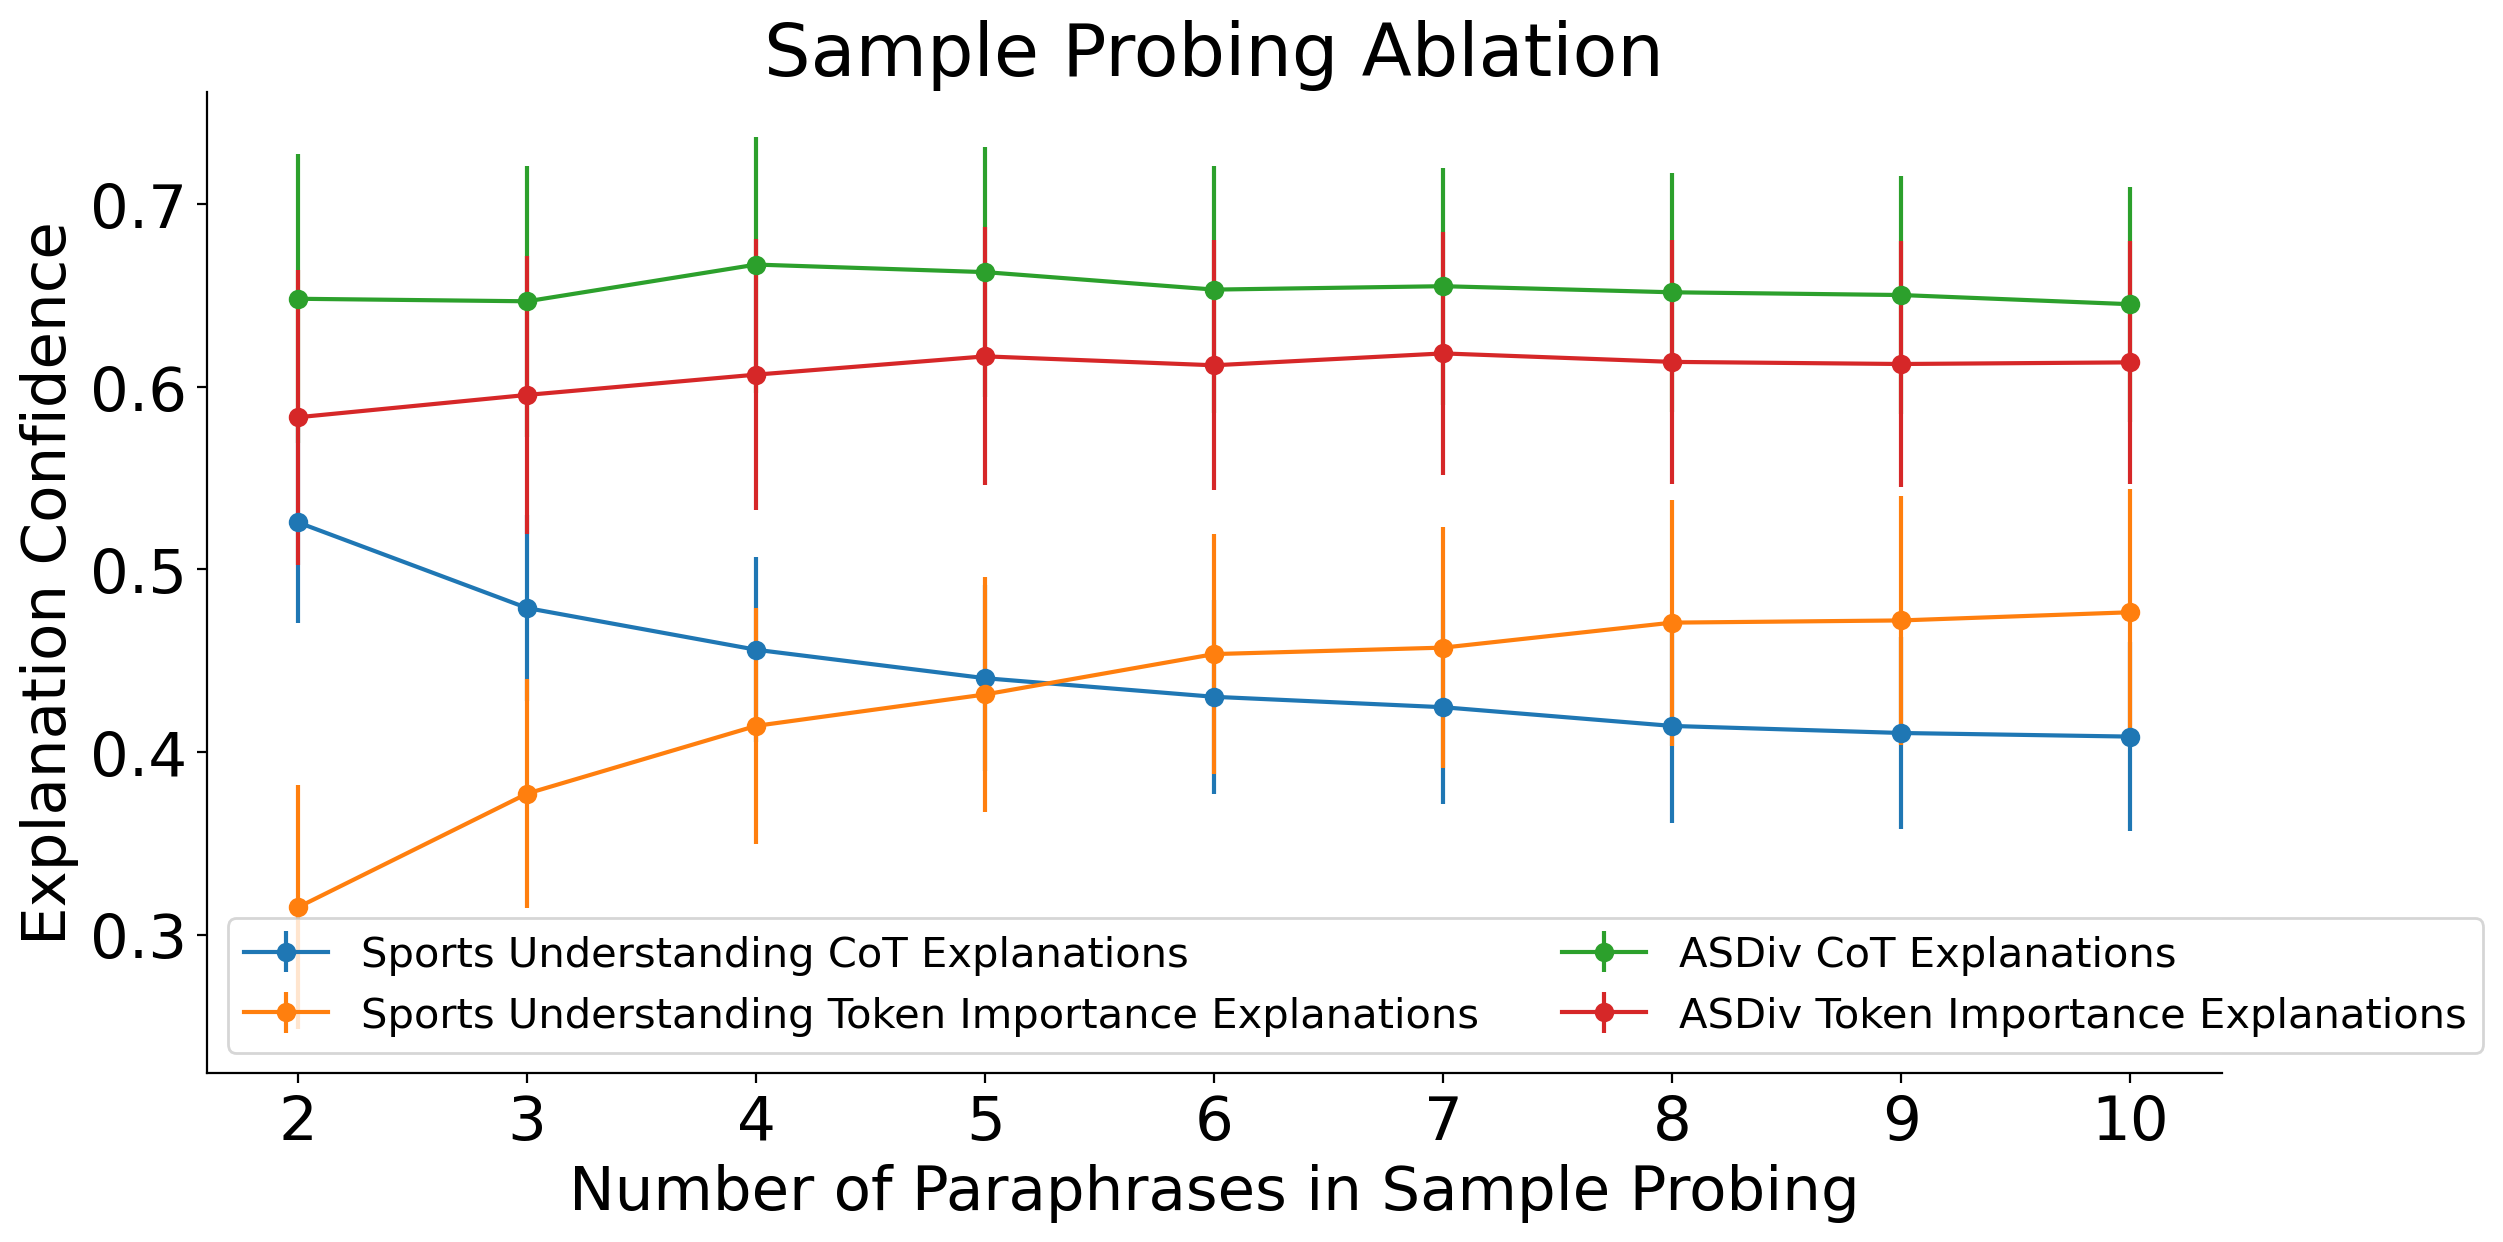

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.04
categories = [*data_all.keys()]

import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

fig, ax = plt.subplots(1, 1, figsize=(13, 6.5), dpi=200)

def parse_sample_probing_analysis_txt(raw_string):
    sentences = raw_string.split("\n")
    sentences = list(filter(lambda sentence: sentence.strip() != "", sentences))
    return pd.DataFrame([{
           "k": int(sentence.split()[0]),
           "cot_mean": float(sentence.split()[1]),
           "cot_std": float(sentence.split()[2]),
           "fi_mean": float(sentence.split()[3]),
           "fi_std": float(sentence.split()[4]),
       } for sentence in sentences])

def parse_model_probing_analysis_txt(raw_string):
    sentences = raw_string.split("\n")
    sentences = list(filter(lambda sentence: sentence.strip() != "", sentences))
    return pd.DataFrame([{
        "k": int(sentence.split()[0]),
        "cot_mean": float(sentence.split()[1]),
        "cot_std": float(sentence.split()[3]),
        "fi_mean": float(sentence.split()[2]),
        "fi_std": float(sentence.split()[4]),
       } for sentence in sentences])


sports_understanding_ablation_sample_probing = r"""
2 0.5256785714285713 0.21926276992057409 0.31499999999999995 0.26655726922704204
3 0.4788095238095238 0.20307907135267866 0.3772222222222221 0.2518199189995467
4 0.45596626984126987 0.2023775540583807 0.4143055555555556 0.25825159250402346
5 0.44038928571428576 0.20357926736160978 0.4315 0.25785326361238003
6 0.430205291005291 0.21258852678452936 0.4536111111111111 0.26220147634506347
7 0.4245031179138322 0.2123880219925938 0.4571428571428571 0.2641772502535453
8 0.4142567318594104 0.2123929688447488 0.47083333333333327 0.26929541107125515
9 0.41039225088183406 0.20949552455445733 0.47203703703703703 0.27311120277449763
10 0.4084149470899471 0.20632232078832885 0.4765092592592593 0.26910238740562564
"""

sports_understanding_ablation_model_probing = r"""
2 0.3462599206349207 0.6358333333333334 0.256318520226799 0.354662398157271
3 0.33735978835978836 0.6488888888888888 0.21532267903556251 0.30203834275440455
4 0.32707287157287157 0.6433333333333334 0.19343383053471877 0.27356443482294984
5 0.32975909090909084 0.6306666666666667 0.19122510932461295 0.2509838418880564
"""

asdiv_ablation_sample_probing = r"""
2 0.6482096861471862 0.3161124344230706 0.5833333333333333 0.3227486121839514
3 0.646830266955267 0.29669813154495217 0.5955555555555555 0.30490638109847407
4 0.6669368235930736 0.28045894901109386 0.6066666666666667 0.29629189811550516
5 0.6628002525252525 0.27400903167832574 0.6166666666666666 0.28274448614331005
6 0.653230765993266 0.2705964127884398 0.6117777777777778 0.2740767667535395
7 0.65509470727685 0.259299541813742 0.6182857142857142 0.2667403979701932
8 0.6517614898989899 0.2612546178744309 0.6136428571428572 0.2677686319370383
9 0.6502594356261023 0.2599473681140361 0.6124854497354497 0.2693862896405778
10 0.6452318783068783 0.2574329244829601 0.6133743386243387 0.2669433343790801
"""

asdiv_ablation_model_probing = r"""
2 0.369797619047619 0.5283333333333333 0.2868220088289552 0.29726064133835295
3 0.3498015873015873 0.5166666666666666 0.2487407688631323 0.27051619608755223
4 0.3542395833333334 0.5283333333333333 0.24894889051001182 0.25033865950836365
5 0.3616663059163059 0.5273333333333333 0.23252009087361764 0.22824840269612695
"""

sports_understanding_ablation_sample_probing = parse_sample_probing_analysis_txt(sports_understanding_ablation_sample_probing)
sports_understanding_ablation_model_probing = parse_model_probing_analysis_txt(sports_understanding_ablation_model_probing)

asdiv_ablation_sample_probing = parse_sample_probing_analysis_txt(asdiv_ablation_sample_probing)
asdiv_ablation_model_probing = parse_model_probing_analysis_txt(asdiv_ablation_model_probing)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.errorbar(
    sports_understanding_ablation_sample_probing['k'], 
    sports_understanding_ablation_sample_probing['cot_mean'], 
    yerr=sports_understanding_ablation_sample_probing['cot_std'] * 0.25, 
    fmt='-o',
    label="Sports Understanding CoT Explanations"
)
ax.errorbar(
    sports_understanding_ablation_sample_probing['k'], 
    sports_understanding_ablation_sample_probing['fi_mean'], 
    yerr=sports_understanding_ablation_sample_probing['fi_std'] * 0.25, 
    fmt='-o',
    label="Sports Understanding Token Importance Explanations"
)
ax.errorbar(
    asdiv_ablation_sample_probing['k'], 
    asdiv_ablation_sample_probing['cot_mean'], 
    yerr=asdiv_ablation_sample_probing['cot_std'] * 0.25, 
    fmt='-o',
    label="ASDiv CoT Explanations"
)
ax.errorbar(
    asdiv_ablation_sample_probing['k'], 
    asdiv_ablation_sample_probing['fi_mean'], 
    yerr=asdiv_ablation_sample_probing['fi_std'] * 0.25, 
    fmt='-o',
    label="ASDiv Token Importance Explanations"
)

ax.set_ylabel("Explanation Confidence")
ax.set_xlabel("Number of Paraphrases in Sample Probing")
ax.set_title(f"Sample Probing Ablation")
ax.legend(fontsize=15, ncol=2, loc='lower left')
fig.savefig(f"sampleprobingablationfinal.pdf", bbox_inches='tight')

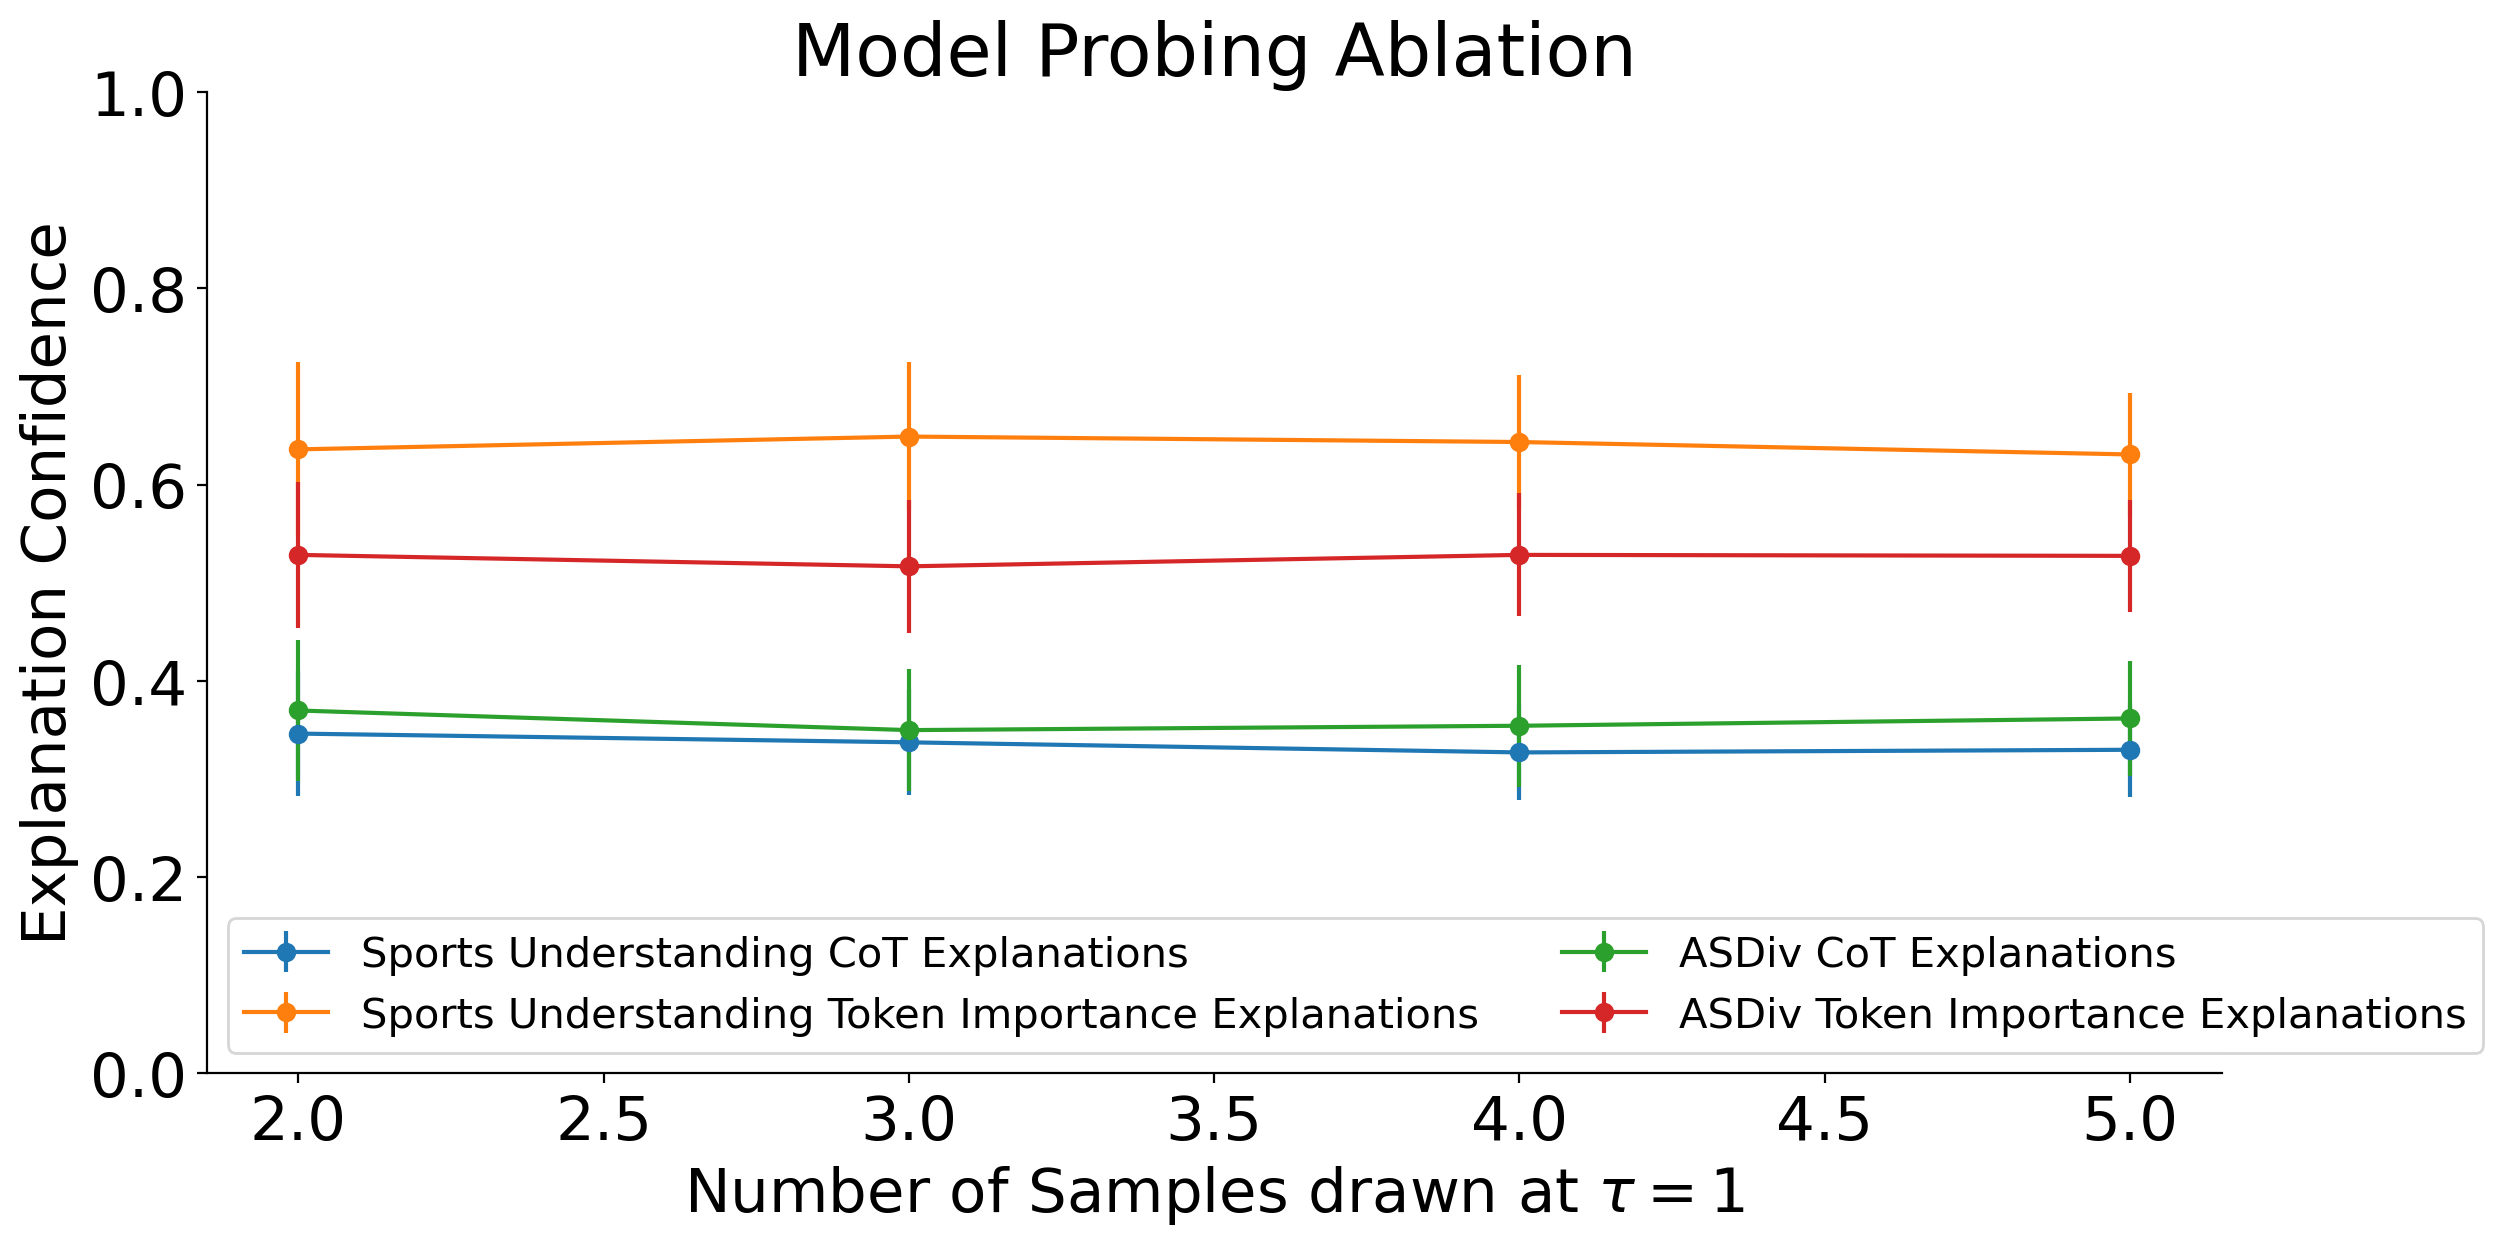

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.04
categories = [*data_all.keys()]

import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

fig, ax = plt.subplots(1, 1, figsize=(13, 6.5), dpi=200)

def parse_sample_probing_analysis_txt(raw_string):
    sentences = raw_string.split("\n")
    sentences = list(filter(lambda sentence: sentence.strip() != "", sentences))
    return pd.DataFrame([{
           "k": int(sentence.split()[0]),
           "cot_mean": float(sentence.split()[1]),
           "cot_std": float(sentence.split()[2]),
           "fi_mean": float(sentence.split()[3]),
           "fi_std": float(sentence.split()[4]),
       } for sentence in sentences])

def parse_model_probing_analysis_txt(raw_string):
    sentences = raw_string.split("\n")
    sentences = list(filter(lambda sentence: sentence.strip() != "", sentences))
    return pd.DataFrame([{
        "k": int(sentence.split()[0]),
        "cot_mean": float(sentence.split()[1]),
        "cot_std": float(sentence.split()[3]),
        "fi_mean": float(sentence.split()[2]),
        "fi_std": float(sentence.split()[4]),
       } for sentence in sentences])


sports_understanding_ablation_sample_probing = r"""
2 0.5256785714285713 0.21926276992057409 0.31499999999999995 0.26655726922704204
3 0.4788095238095238 0.20307907135267866 0.3772222222222221 0.2518199189995467
4 0.45596626984126987 0.2023775540583807 0.4143055555555556 0.25825159250402346
5 0.44038928571428576 0.20357926736160978 0.4315 0.25785326361238003
6 0.430205291005291 0.21258852678452936 0.4536111111111111 0.26220147634506347
7 0.4245031179138322 0.2123880219925938 0.4571428571428571 0.2641772502535453
8 0.4142567318594104 0.2123929688447488 0.47083333333333327 0.26929541107125515
9 0.41039225088183406 0.20949552455445733 0.47203703703703703 0.27311120277449763
10 0.4084149470899471 0.20632232078832885 0.4765092592592593 0.26910238740562564
"""

sports_understanding_ablation_model_probing = r"""
2 0.3462599206349207 0.6358333333333334 0.256318520226799 0.354662398157271
3 0.33735978835978836 0.6488888888888888 0.21532267903556251 0.30203834275440455
4 0.32707287157287157 0.6433333333333334 0.19343383053471877 0.27356443482294984
5 0.32975909090909084 0.6306666666666667 0.19122510932461295 0.2509838418880564
"""

asdiv_ablation_sample_probing = r"""
2 0.6482096861471862 0.3161124344230706 0.5833333333333333 0.3227486121839514
3 0.646830266955267 0.29669813154495217 0.5955555555555555 0.30490638109847407
4 0.6669368235930736 0.28045894901109386 0.6066666666666667 0.29629189811550516
5 0.6628002525252525 0.27400903167832574 0.6166666666666666 0.28274448614331005
6 0.653230765993266 0.2705964127884398 0.6117777777777778 0.2740767667535395
7 0.65509470727685 0.259299541813742 0.6182857142857142 0.2667403979701932
8 0.6517614898989899 0.2612546178744309 0.6136428571428572 0.2677686319370383
9 0.6502594356261023 0.2599473681140361 0.6124854497354497 0.2693862896405778
10 0.6452318783068783 0.2574329244829601 0.6133743386243387 0.2669433343790801
"""

asdiv_ablation_model_probing = r"""
2 0.369797619047619 0.5283333333333333 0.2868220088289552 0.29726064133835295
3 0.3498015873015873 0.5166666666666666 0.2487407688631323 0.27051619608755223
4 0.3542395833333334 0.5283333333333333 0.24894889051001182 0.25033865950836365
5 0.3616663059163059 0.5273333333333333 0.23252009087361764 0.22824840269612695
"""

sports_understanding_ablation_sample_probing = parse_sample_probing_analysis_txt(sports_understanding_ablation_sample_probing)
sports_understanding_ablation_model_probing = parse_model_probing_analysis_txt(sports_understanding_ablation_model_probing)

asdiv_ablation_sample_probing = parse_sample_probing_analysis_txt(asdiv_ablation_sample_probing)
asdiv_ablation_model_probing = parse_model_probing_analysis_txt(asdiv_ablation_model_probing)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.errorbar(
    sports_understanding_ablation_model_probing['k'], 
    sports_understanding_ablation_model_probing['cot_mean'], 
    yerr=sports_understanding_ablation_model_probing['cot_std'] * 0.25, 
    fmt='-o',
    label="Sports Understanding CoT Explanations"
)
ax.errorbar(
    sports_understanding_ablation_model_probing['k'], 
    sports_understanding_ablation_model_probing['fi_mean'], 
    yerr=sports_understanding_ablation_model_probing['fi_std'] * 0.25, 
    fmt='-o',
    label="Sports Understanding Token Importance Explanations"
)
ax.errorbar(
    asdiv_ablation_model_probing['k'], 
    asdiv_ablation_model_probing['cot_mean'], 
    yerr=asdiv_ablation_model_probing['cot_std'] * 0.25, 
    fmt='-o',
    label="ASDiv CoT Explanations"
)
ax.errorbar(
    asdiv_ablation_model_probing['k'], 
    asdiv_ablation_model_probing['fi_mean'], 
    yerr=asdiv_ablation_model_probing['fi_std'] * 0.25, 
    fmt='-o',
    label="ASDiv Token Importance Explanations"
)

ax.set_ylabel("Explanation Confidence")
ax.set_xlabel(r"Number of Samples drawn at $\tau = 1$")
ax.set_title(f"Model Probing Ablation")
ax.legend(fontsize=15, ncol=2, loc='lower left')
ax.set_ylim([0, 1])
fig.savefig(f"modelprobingablationfinal.pdf", bbox_inches='tight')

# Verbalized Confidence Plot

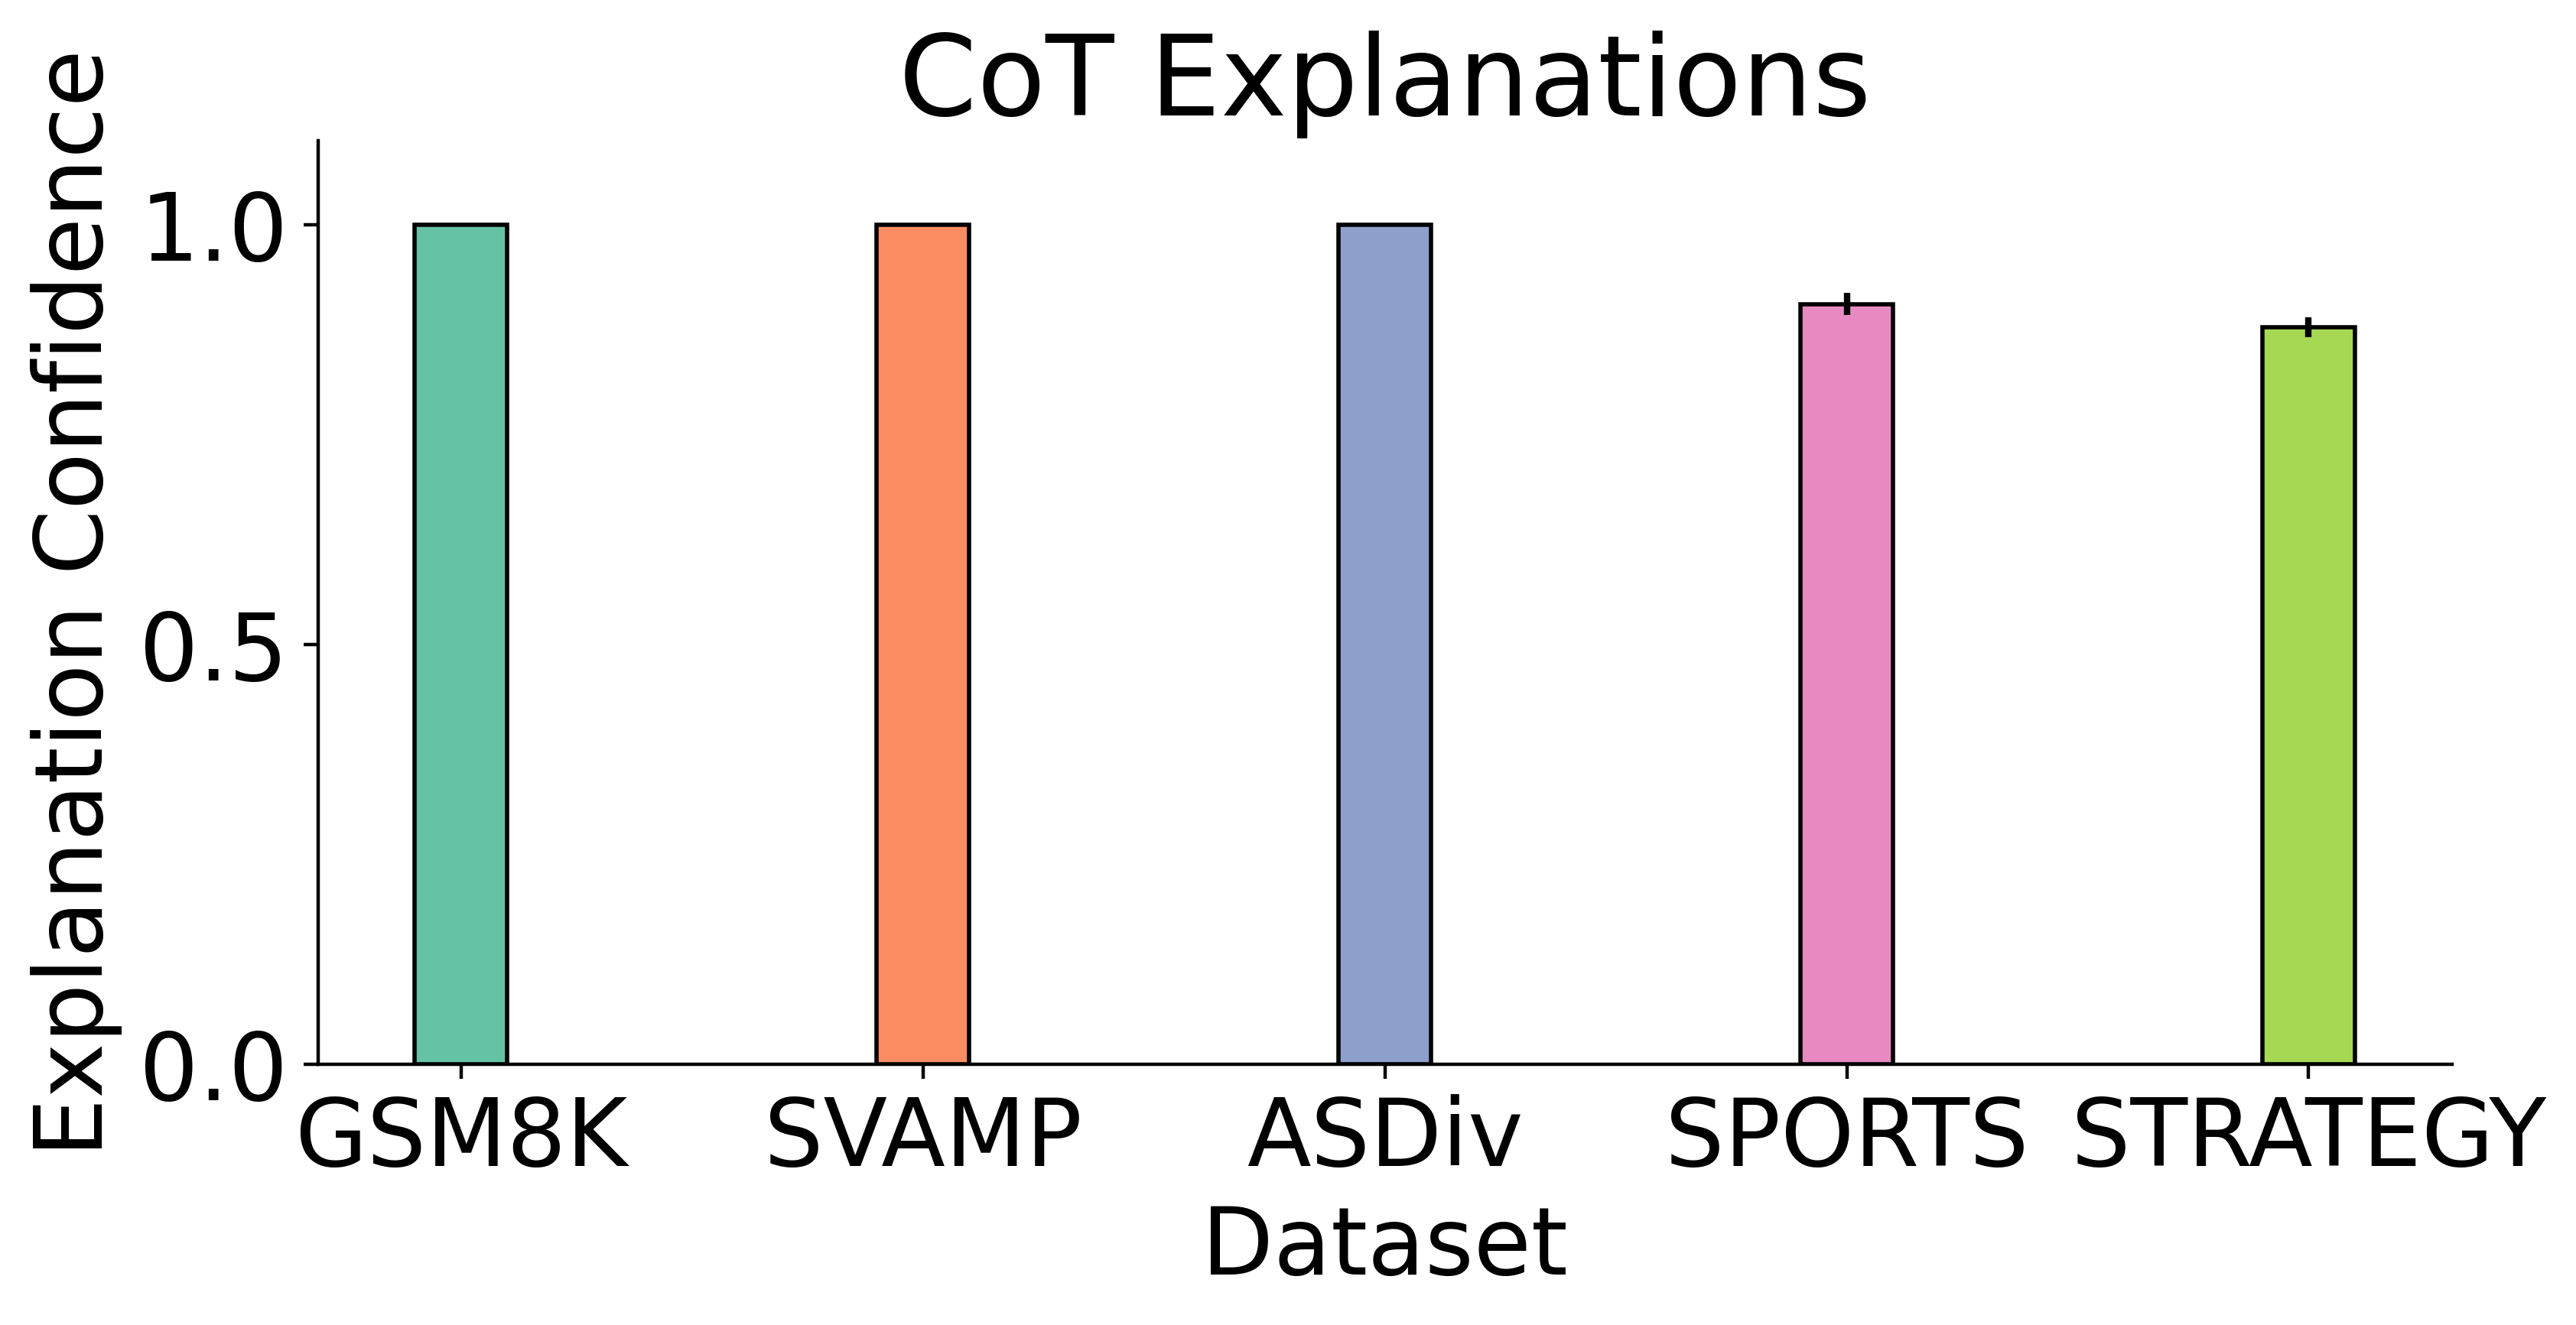

In [120]:
import matplotlib.pyplot as plt

import pandas as pd

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SPORTS": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "STRATEGY": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.2
categories = [*data_all.keys()]

fig, ax = plt.subplots(figsize=(9, 4), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("CoT Explanations")
ax.set_xlabel("Dataset")
ax.set_ylabel("Explanation Confidence")
ax.set_ylim([0, 1.1])

boxes_cot_mean = []
boxes_cot_err = []

for dataset_name in data_all:
    data = data_all[dataset_name]["text-davinci-003"]
    data = data.dropna(subset=["experiment_1_new_score"])

    scores = data["experiment_1_new_score"].astype(int) / 100.0
    boxes_cot_mean.append(scores.mean())
    boxes_cot_err.append(scores.std()/np.sqrt(len(scores)))

x = np.arange(len(data_all))

ax.bar(x + bar_width / 2, boxes_cot_mean, bar_width, yerr=boxes_cot_err, edgecolor='black', color=sns.color_palette("Set2", 5))
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)
 

fig.savefig("verbalizedoverconfidence_cotfinal.pdf", bbox_inches='tight')

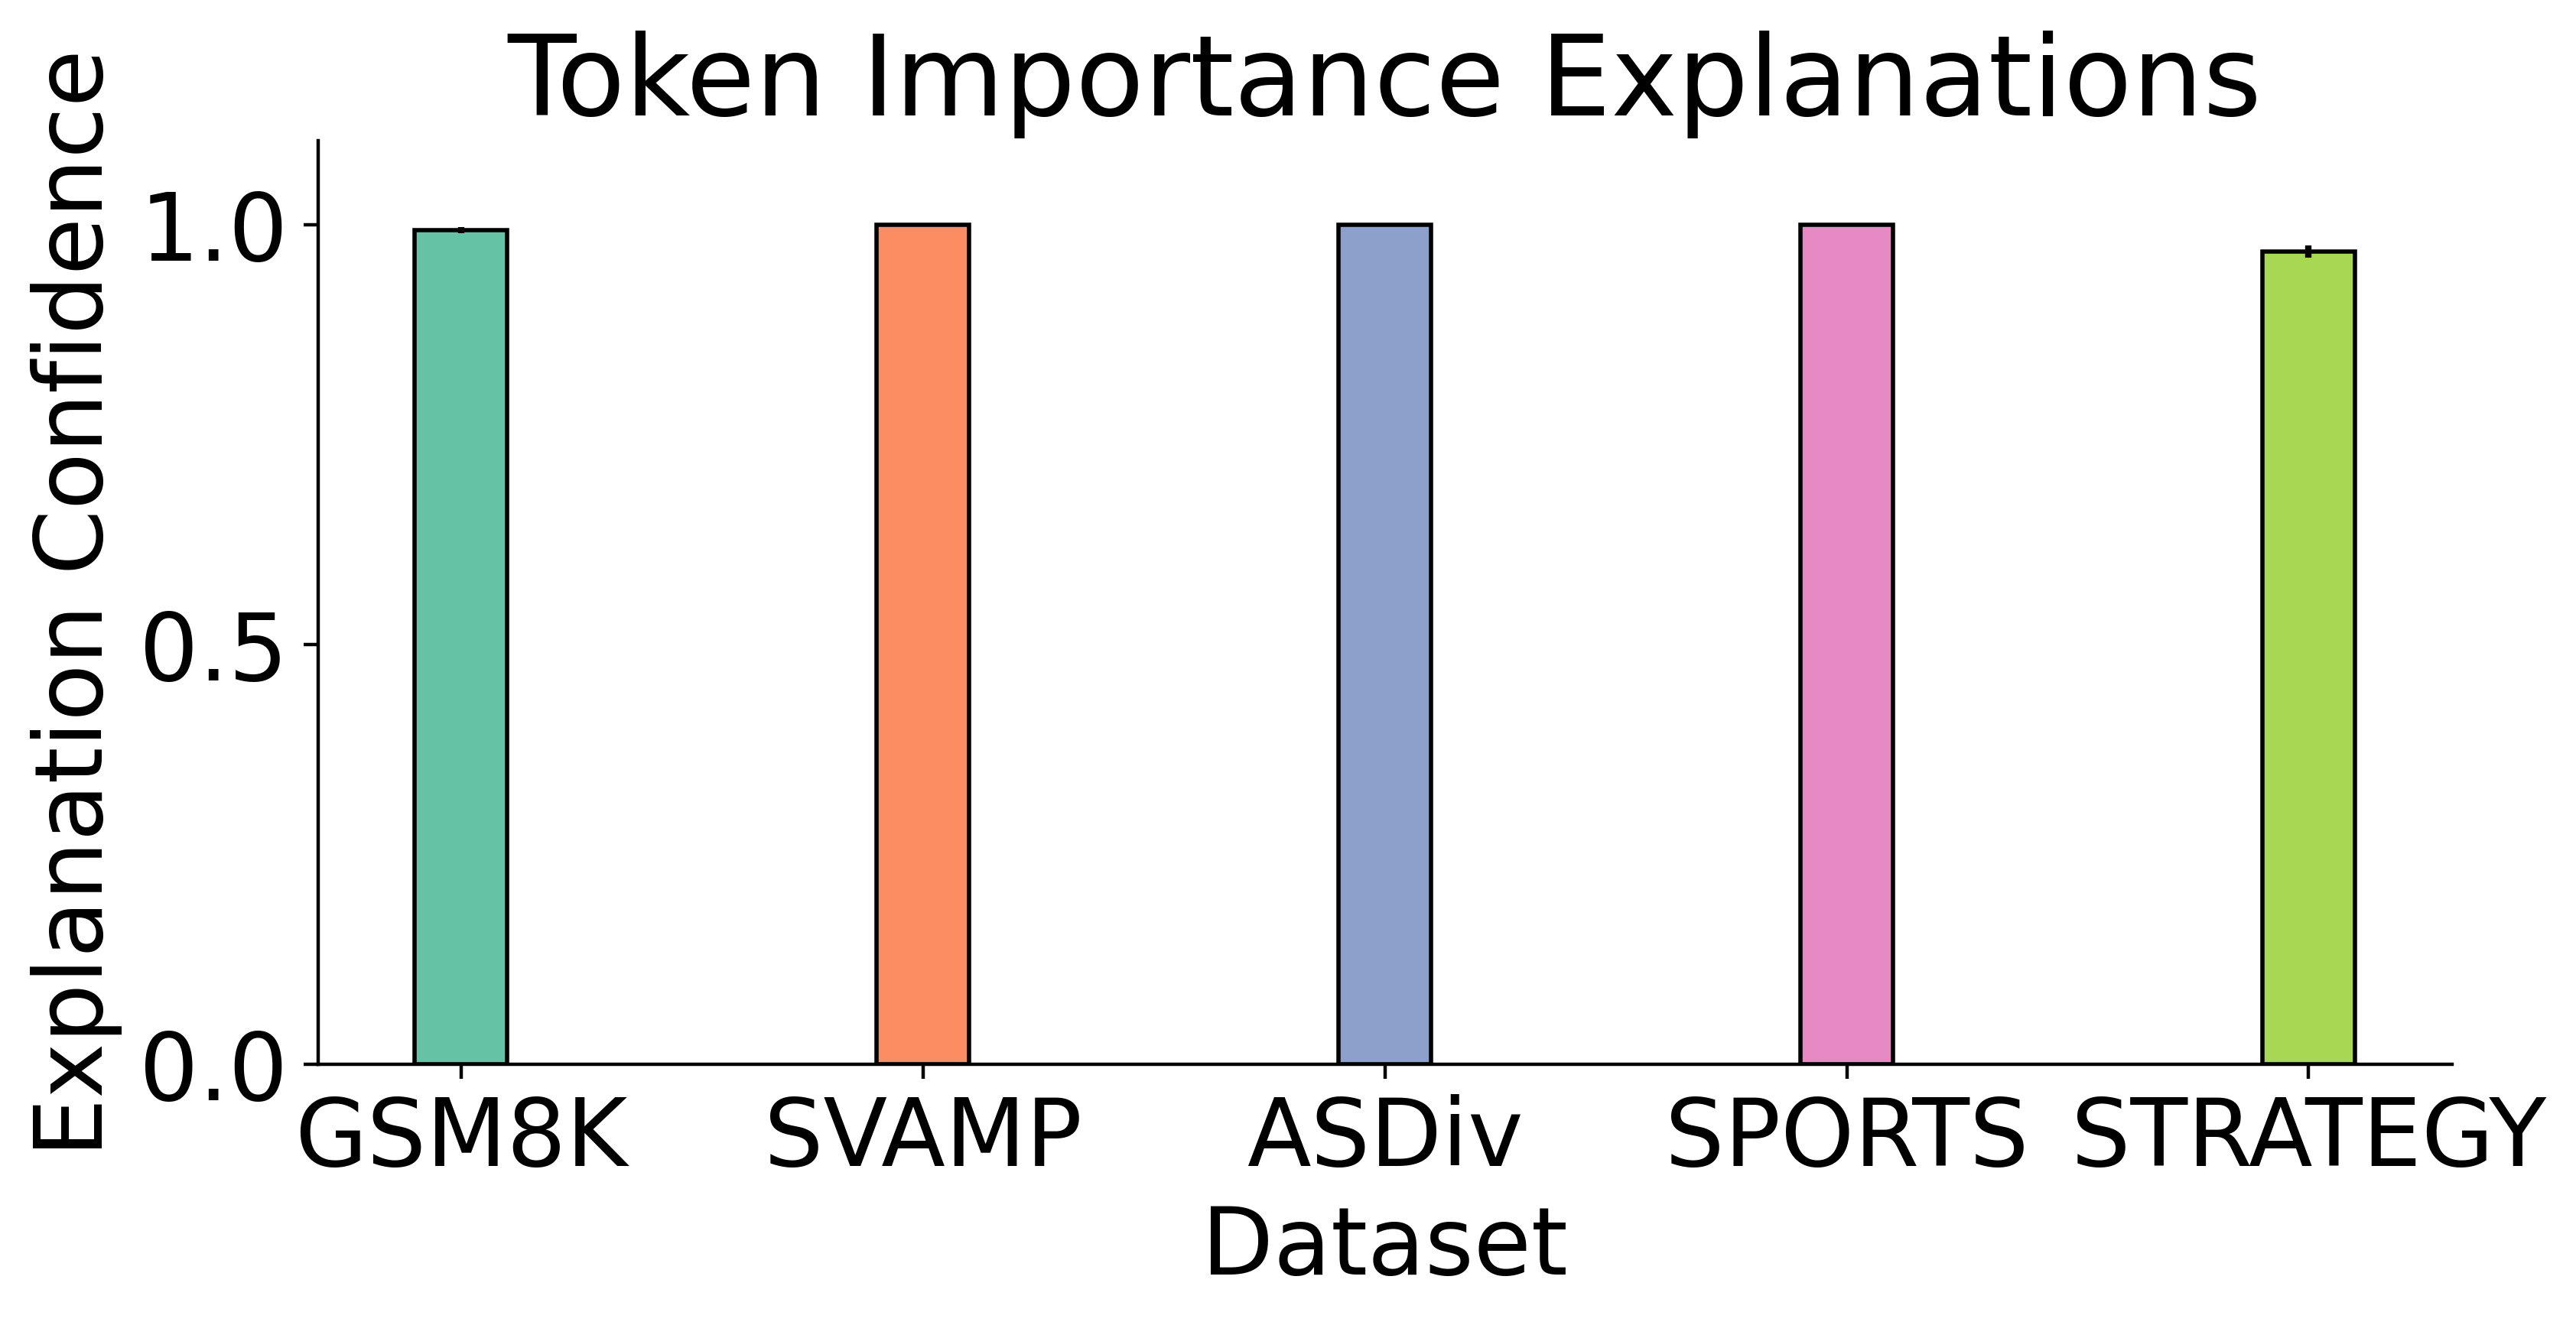

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SPORTS": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "STRATEGY": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.2
categories = [*data_all.keys()]


fig, ax = plt.subplots(figsize=(9, 4), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Token Importance Explanations")
ax.set_xlabel("Dataset")
ax.set_ylabel("Explanation Confidence")
ax.set_ylim([0, 1.1])

boxes_fi_mean = []
boxes_fi_err = []

for dataset_name in data_all:
    data = data_all[dataset_name]["text-davinci-003"]

    scores = data["experiment_3_score"].astype(int) / 100
    boxes_fi_mean.append(scores.mean())
    boxes_fi_err.append(scores.std()/np.sqrt(len(scores)))
x = np.arange(len(data_all))
ax.bar(x + bar_width / 2, boxes_fi_mean, bar_width, yerr=boxes_fi_err, edgecolor='black', color=sns.color_palette("Set2", 5))
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)

fig.savefig("verbalizedoverconfidence_fifinal.pdf", bbox_inches='tight')

# Instruct GPT v/s GPT-3.5-Turbo v/s GPT-4

model_name: text-davinci-003 correct: 33 incorrect: 67
model_name: gpt-3.5-turbo correct: 54 incorrect: 46
model_name: gpt-4-turbo correct: 89 incorrect: 7
model_name: text-davinci-003 correct: 33 incorrect: 67
model_name: gpt-3.5-turbo correct: 54 incorrect: 46
model_name: gpt-4-turbo correct: 89 incorrect: 7


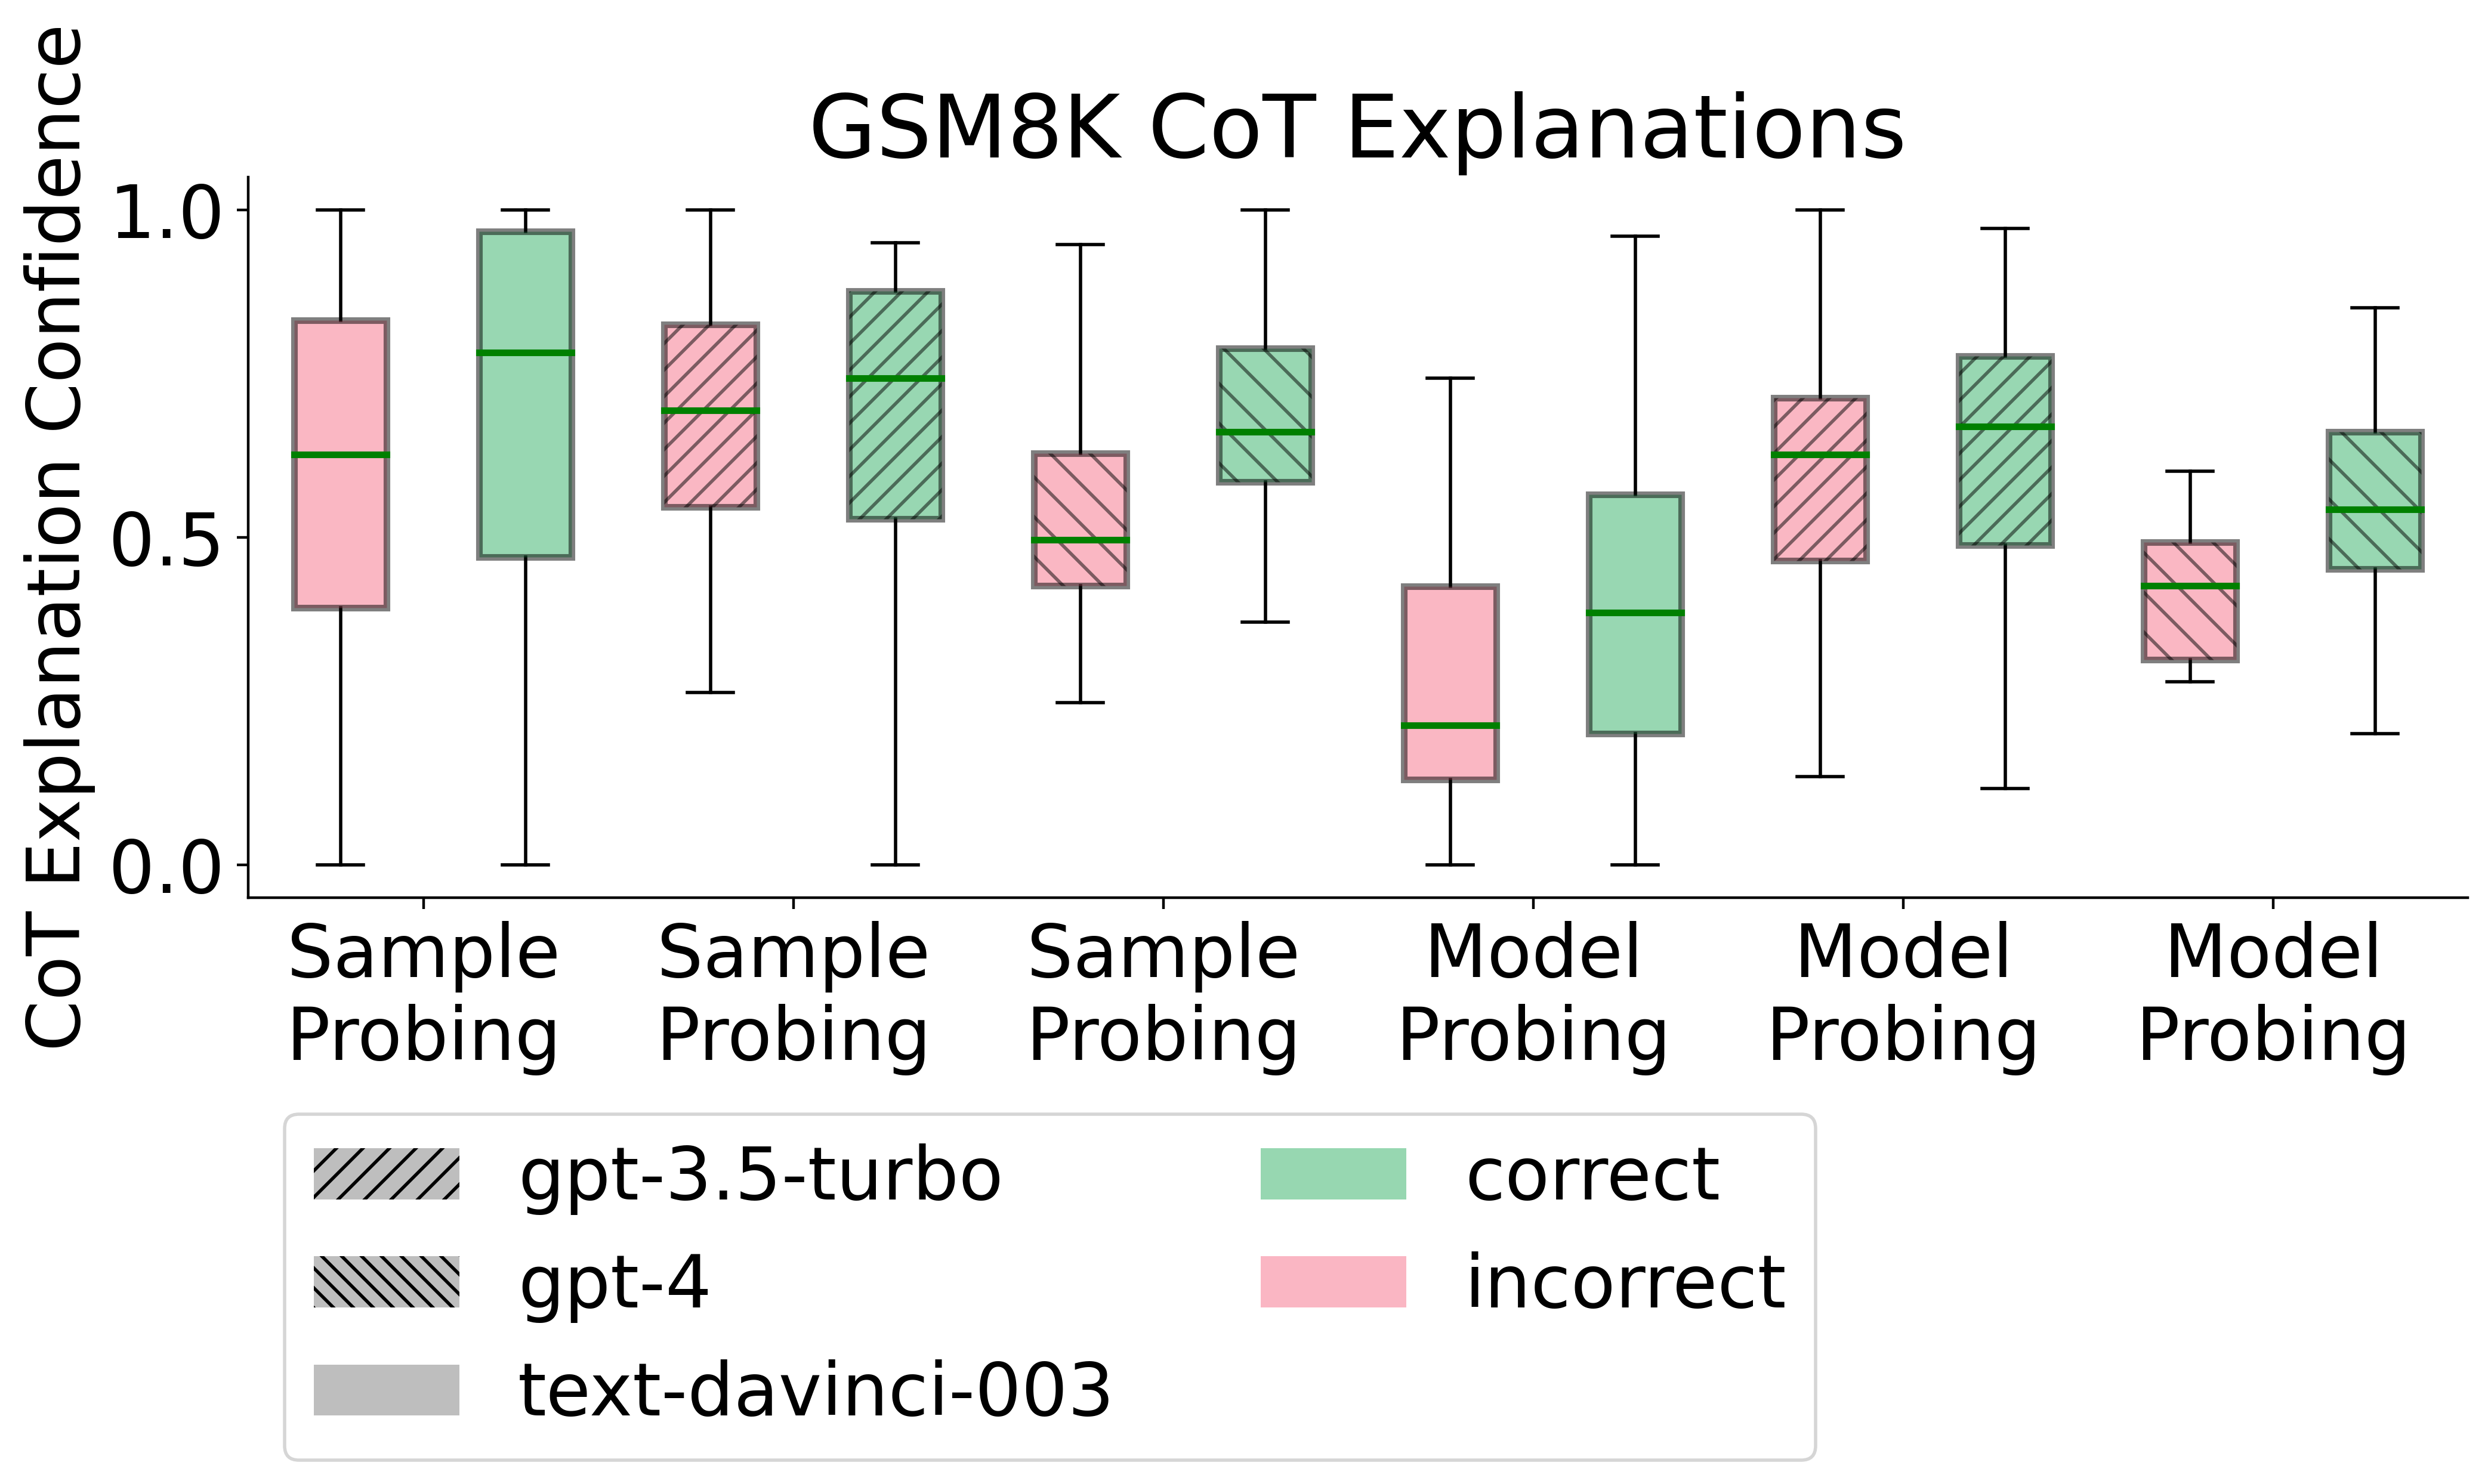

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
boxes = []
positions = []

model_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
        "gpt-4-turbo": pd.read_parquet("data/gsm8k_100/scores-gpt-4.parquet"),
    },
}

dataset_name = "GSM8K"

for label_name, column_name in [("Paraphrase", "experiment_4_score"), ("Temperature", "experiment_8_score")]:
    for model_name in model_all[dataset_name]:
        data = model_all[dataset_name][model_name]
        correct_data = data[data["correct"]==True]
        incorrect_data = data[data["correct"]==False]
        print(f"model_name: {model_name} correct: {correct_data.shape[0]} incorrect: {incorrect_data.shape[0]}")
        for data_subset_name, scores in [("wrong answers", incorrect_data[column_name]), ("correct answers", correct_data[column_name])]:
            boxes.append(
                {
                    'whislo': scores.min(),             # Bottom whisker position
                    'q1'    : scores.quantile(0.25),    # First quartile (25th percentile)
                    'med'   : scores.quantile(0.50),    # Median         (50th percentile)
                    'mean'  : scores.mean(),            # Mean
                    'q3'    : scores.quantile(0.75),    # Third quartile (75th percentile)
                    'whishi': scores.max(),             # Top whisker position
                    'fliers': [],                      # Outliers
            })

bar_width = 0.1
incorrect_color = sns.color_palette("husl", 8)[0]  # "violet"
correct_color = sns.color_palette("husl", 8)[3]  # "magenta"
x = np.arange(12)
boxplot = ax.bxp(boxes, showfliers=True, showmeans=False, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(linestyle='-', linewidth=2, color='green'), positions=x + bar_width / 2)  # [0, bar_width, 3 * bar_width, 4 * bar_width, 6 * bar_width, 7 * bar_width, 9 * bar_width, 10 * bar_width], widths=[bar_width for _ in range(8)])
for box, color in zip(boxplot['boxes'], [incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color]):
    box.set(facecolor=color, alpha=0.5, linewidth=2)
for box_id in [2, 3, 8, 9]:
    boxplot['boxes'][box_id].set(hatch = '///')
    
for box_id in [4, 5, 10, 11]:
    boxplot['boxes'][box_id].set(hatch = '\\\\')

ax.set_ylabel('CoT Explanation Confidence')
ax.set_title(f'{dataset_name} CoT Explanations')


# Create a legend
legend_labels = ["gpt-3.5-turbo", "gpt-4", "text-davinci-003", "correct", "incorrect"]
legend_elements = [
    mpatches.Patch(facecolor='gray', alpha=0.50, hatch=r'///', label="gpt-3.5-turbo"),
    mpatches.Patch(facecolor='gray', alpha=0.50, hatch=r'\\\\', label="gpt-4"),
    mpatches.Patch(facecolor='gray', alpha=0.50, label="text-davinci-003"),
    mpatches.Patch(facecolor=correct_color, alpha=0.50),
    mpatches.Patch(facecolor=incorrect_color, alpha=0.50),
]

ax.legend(handles=legend_elements, labels=legend_labels, loc="upper left", bbox_to_anchor=(0, -0.25), ncol=2)

ax.set_xticks([0.5, 2.5, 4.5, 6.5, 8.5, 10.5])  # [0.5 * bar_width, 3.5 * bar_width, 6.5 * bar_width, 9.5 * bar_width])
ax.set_xticklabels(["Sample\nProbing", "Sample\nProbing", "Sample\nProbing", "Model\nProbing", "Model\nProbing", "Model\nProbing"])

fig.savefig(f"modelallfinal.pdf", bbox_inches='tight')


# Confidence v/s Accuracy Final

model_name: text-davinci-003 correct: 58 incorrect: 33
model_name: text-davinci-003 correct: 73 incorrect: 27
model_name: text-davinci-003 correct: 33 incorrect: 67
model_name: text-davinci-003 correct: 62 incorrect: 37
model_name: text-davinci-003 correct: 60 incorrect: 40


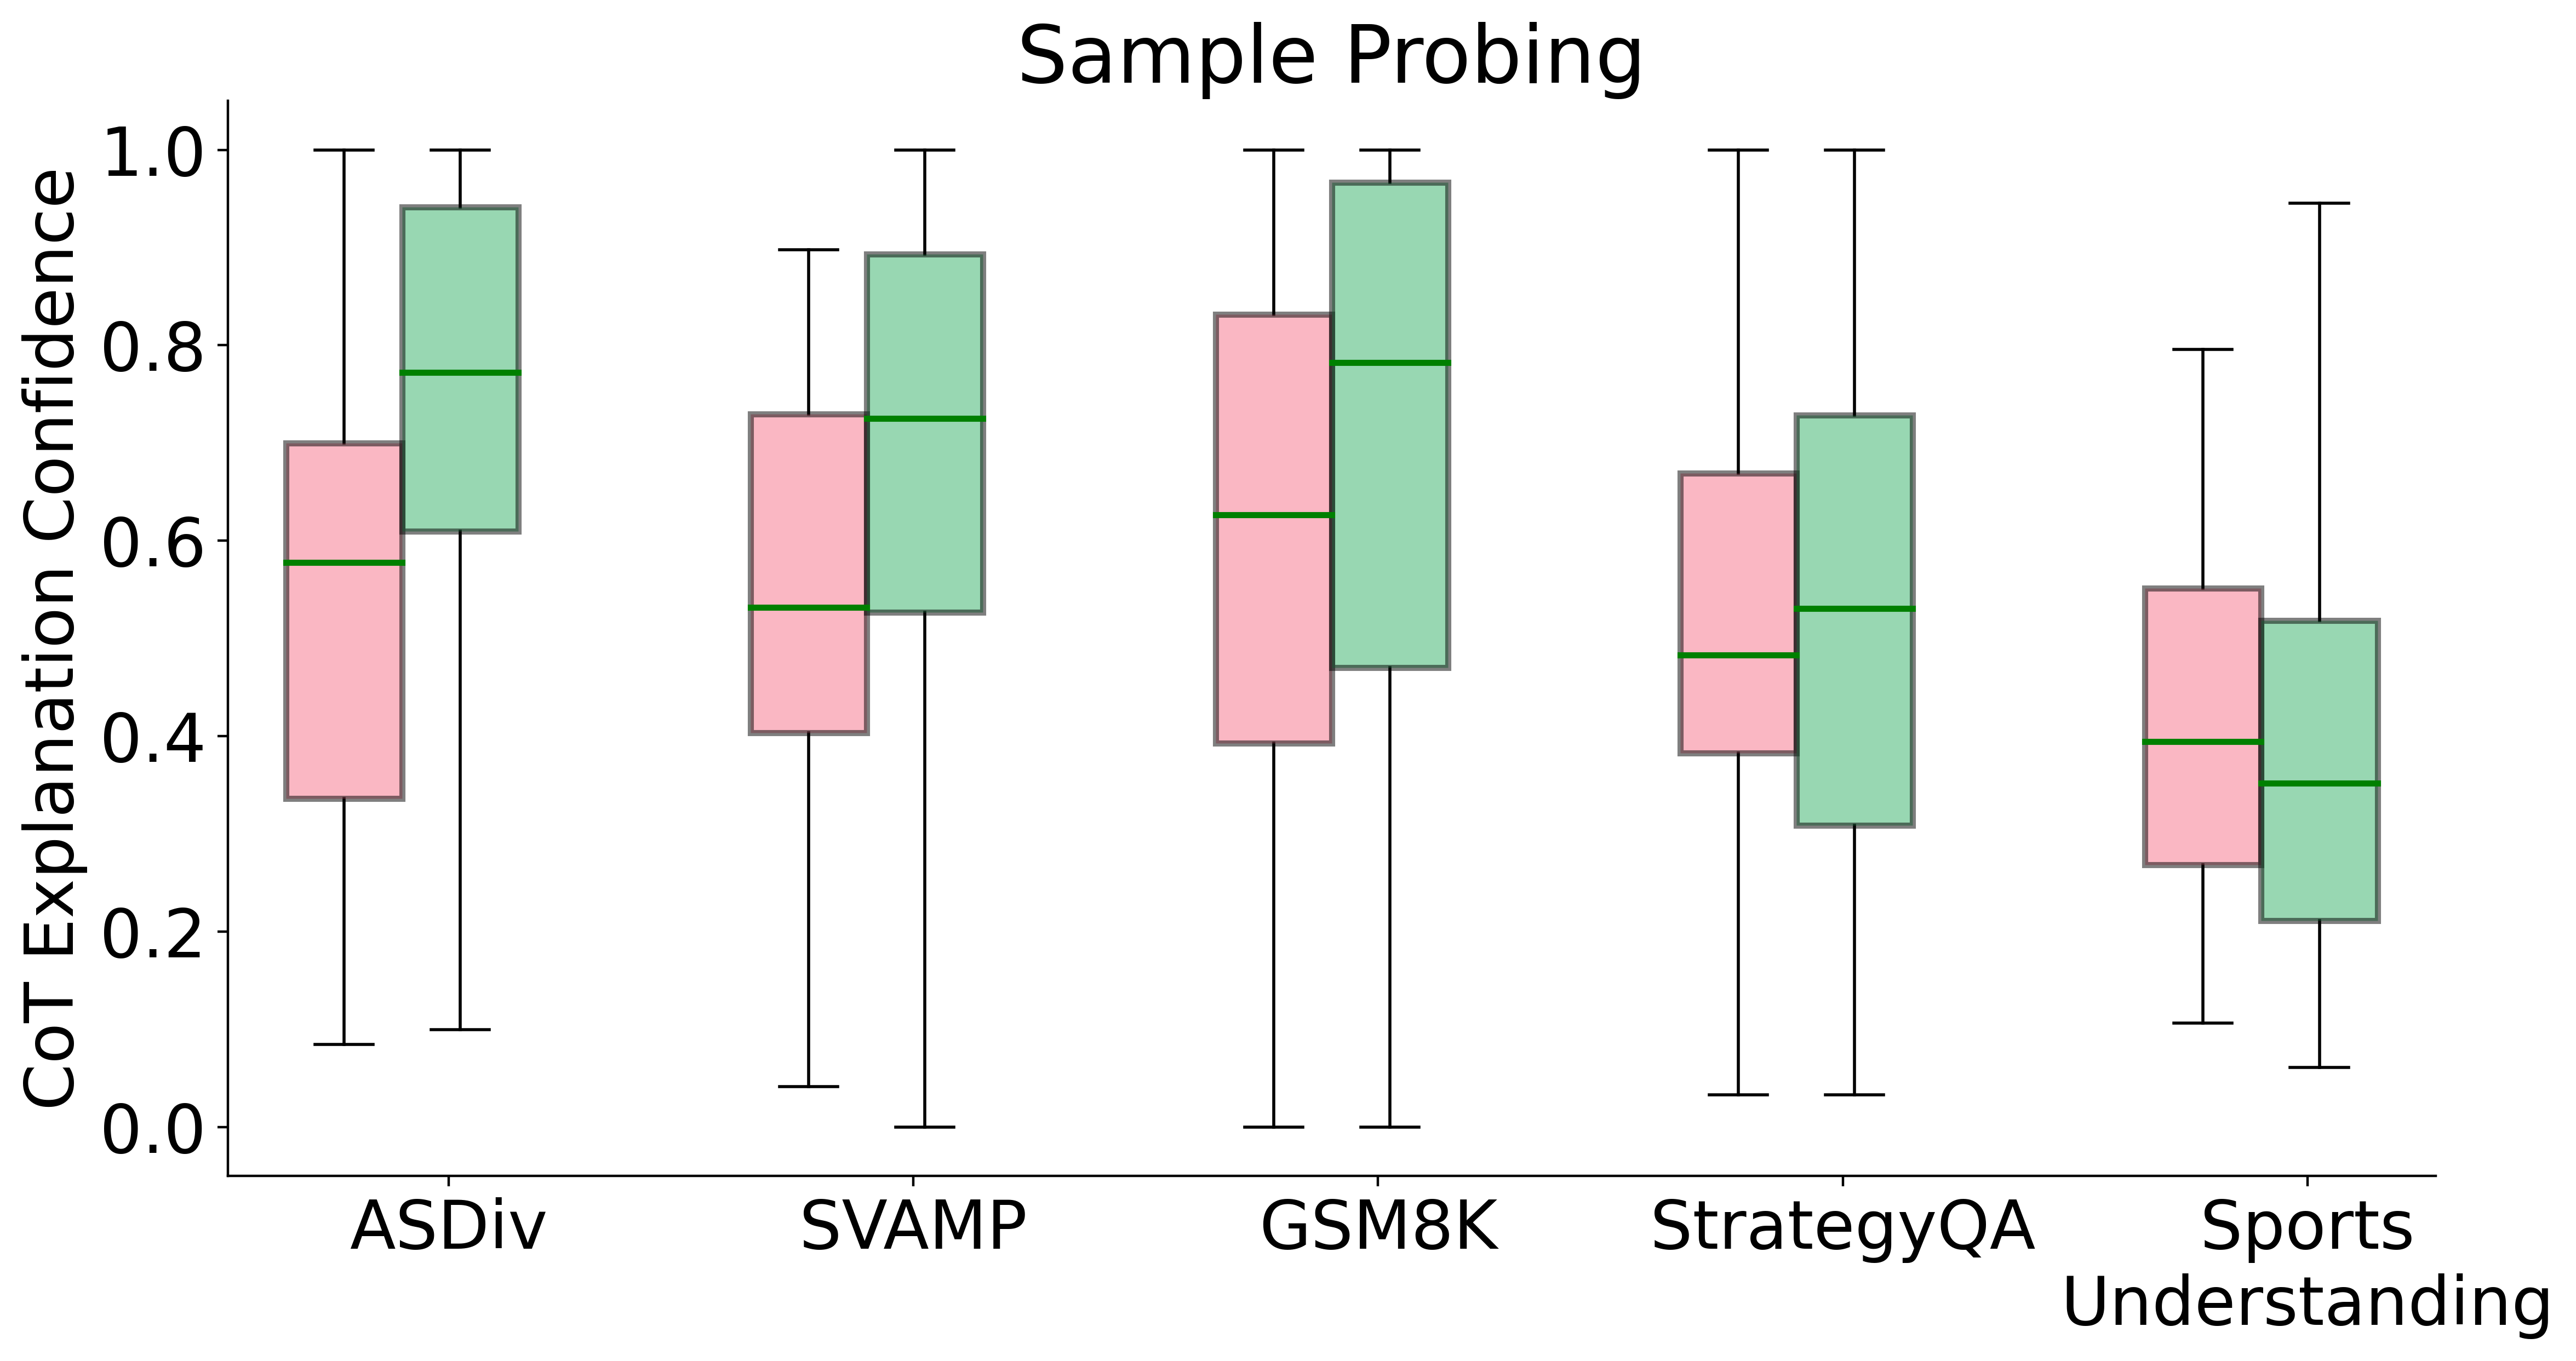

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "Sports Understanding": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "StrategyQA": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.2
categories = [*data_all.keys()]

import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(13, 6.5), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
boxes = []
positions = []

# Choose one dataset in ASDiv, SVAMP, GSM8K, StrategyQA, Sports Understanding
for dataset_name in ["ASDiv", "SVAMP", "GSM8K", "StrategyQA", "Sports Understanding"]:
    for label_name, column_name in [("Paraphrase", "experiment_4_score")]:
        for model_name in ["text-davinci-003"]:
            data = data_all[dataset_name][model_name]
            correct_data = data[data["correct"]==True]
            incorrect_data = data[data["correct"]==False]
            print(f"model_name: {model_name} correct: {correct_data.shape[0]} incorrect: {incorrect_data.shape[0]}")
            for data_subset_name, scores in [("wrong answers", incorrect_data[column_name]), ("correct answers", correct_data[column_name])]:
                boxes.append(
                    {
                        'whislo': scores.min(),             # Bottom whisker position
                        'q1'    : scores.quantile(0.25),    # First quartile (25th percentile)
                        'med'   : scores.quantile(0.50),    # Median         (50th percentile)
                        'mean'  : scores.mean(),            # Mean
                        'q3'    : scores.quantile(0.75),    # Third quartile (75th percentile)
                        'whishi': scores.max(),             # Top whisker position
                        'fliers': [],                      # Outliers
                })

bar_width = 0.1
incorrect_color = sns.color_palette("husl", 8)[0]  # "violet"
correct_color = sns.color_palette("husl", 8)[3]  # "magenta"
x = np.array([0, 0.5, 2, 2.5, 4, 4.5, 6, 6.5, 8, 8.5])
boxplot = ax.bxp(boxes, showfliers=True, showmeans=False, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(linestyle='-', linewidth=2, color='green'), positions=x + bar_width / 2)  # [0, bar_width, 3 * bar_width, 4 * bar_width, 6 * bar_width, 7 * bar_width, 9 * bar_width, 10 * bar_width], widths=[bar_width for _ in range(8)])
for box, color in zip(boxplot['boxes'], [incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color]):
    box.set(facecolor=color, alpha=0.5, linewidth=2)

    
ax.set_ylabel('CoT Explanation Confidence')
ax.set_title(f'Sample Probing')


ax.set_xticks([0.5, 2.5, 4.5, 6.5, 8.5])
ax.set_xticklabels(["ASDiv", "SVAMP", "GSM8K", "StrategyQA", "Sports\nUnderstanding"])

fig.savefig(f"sampleprobingaccuracycotfinal.pdf", bbox_inches='tight')

model_name: text-davinci-003 correct: 58 incorrect: 33
model_name: text-davinci-003 correct: 73 incorrect: 27
model_name: text-davinci-003 correct: 33 incorrect: 67
model_name: text-davinci-003 correct: 62 incorrect: 37
model_name: text-davinci-003 correct: 60 incorrect: 40


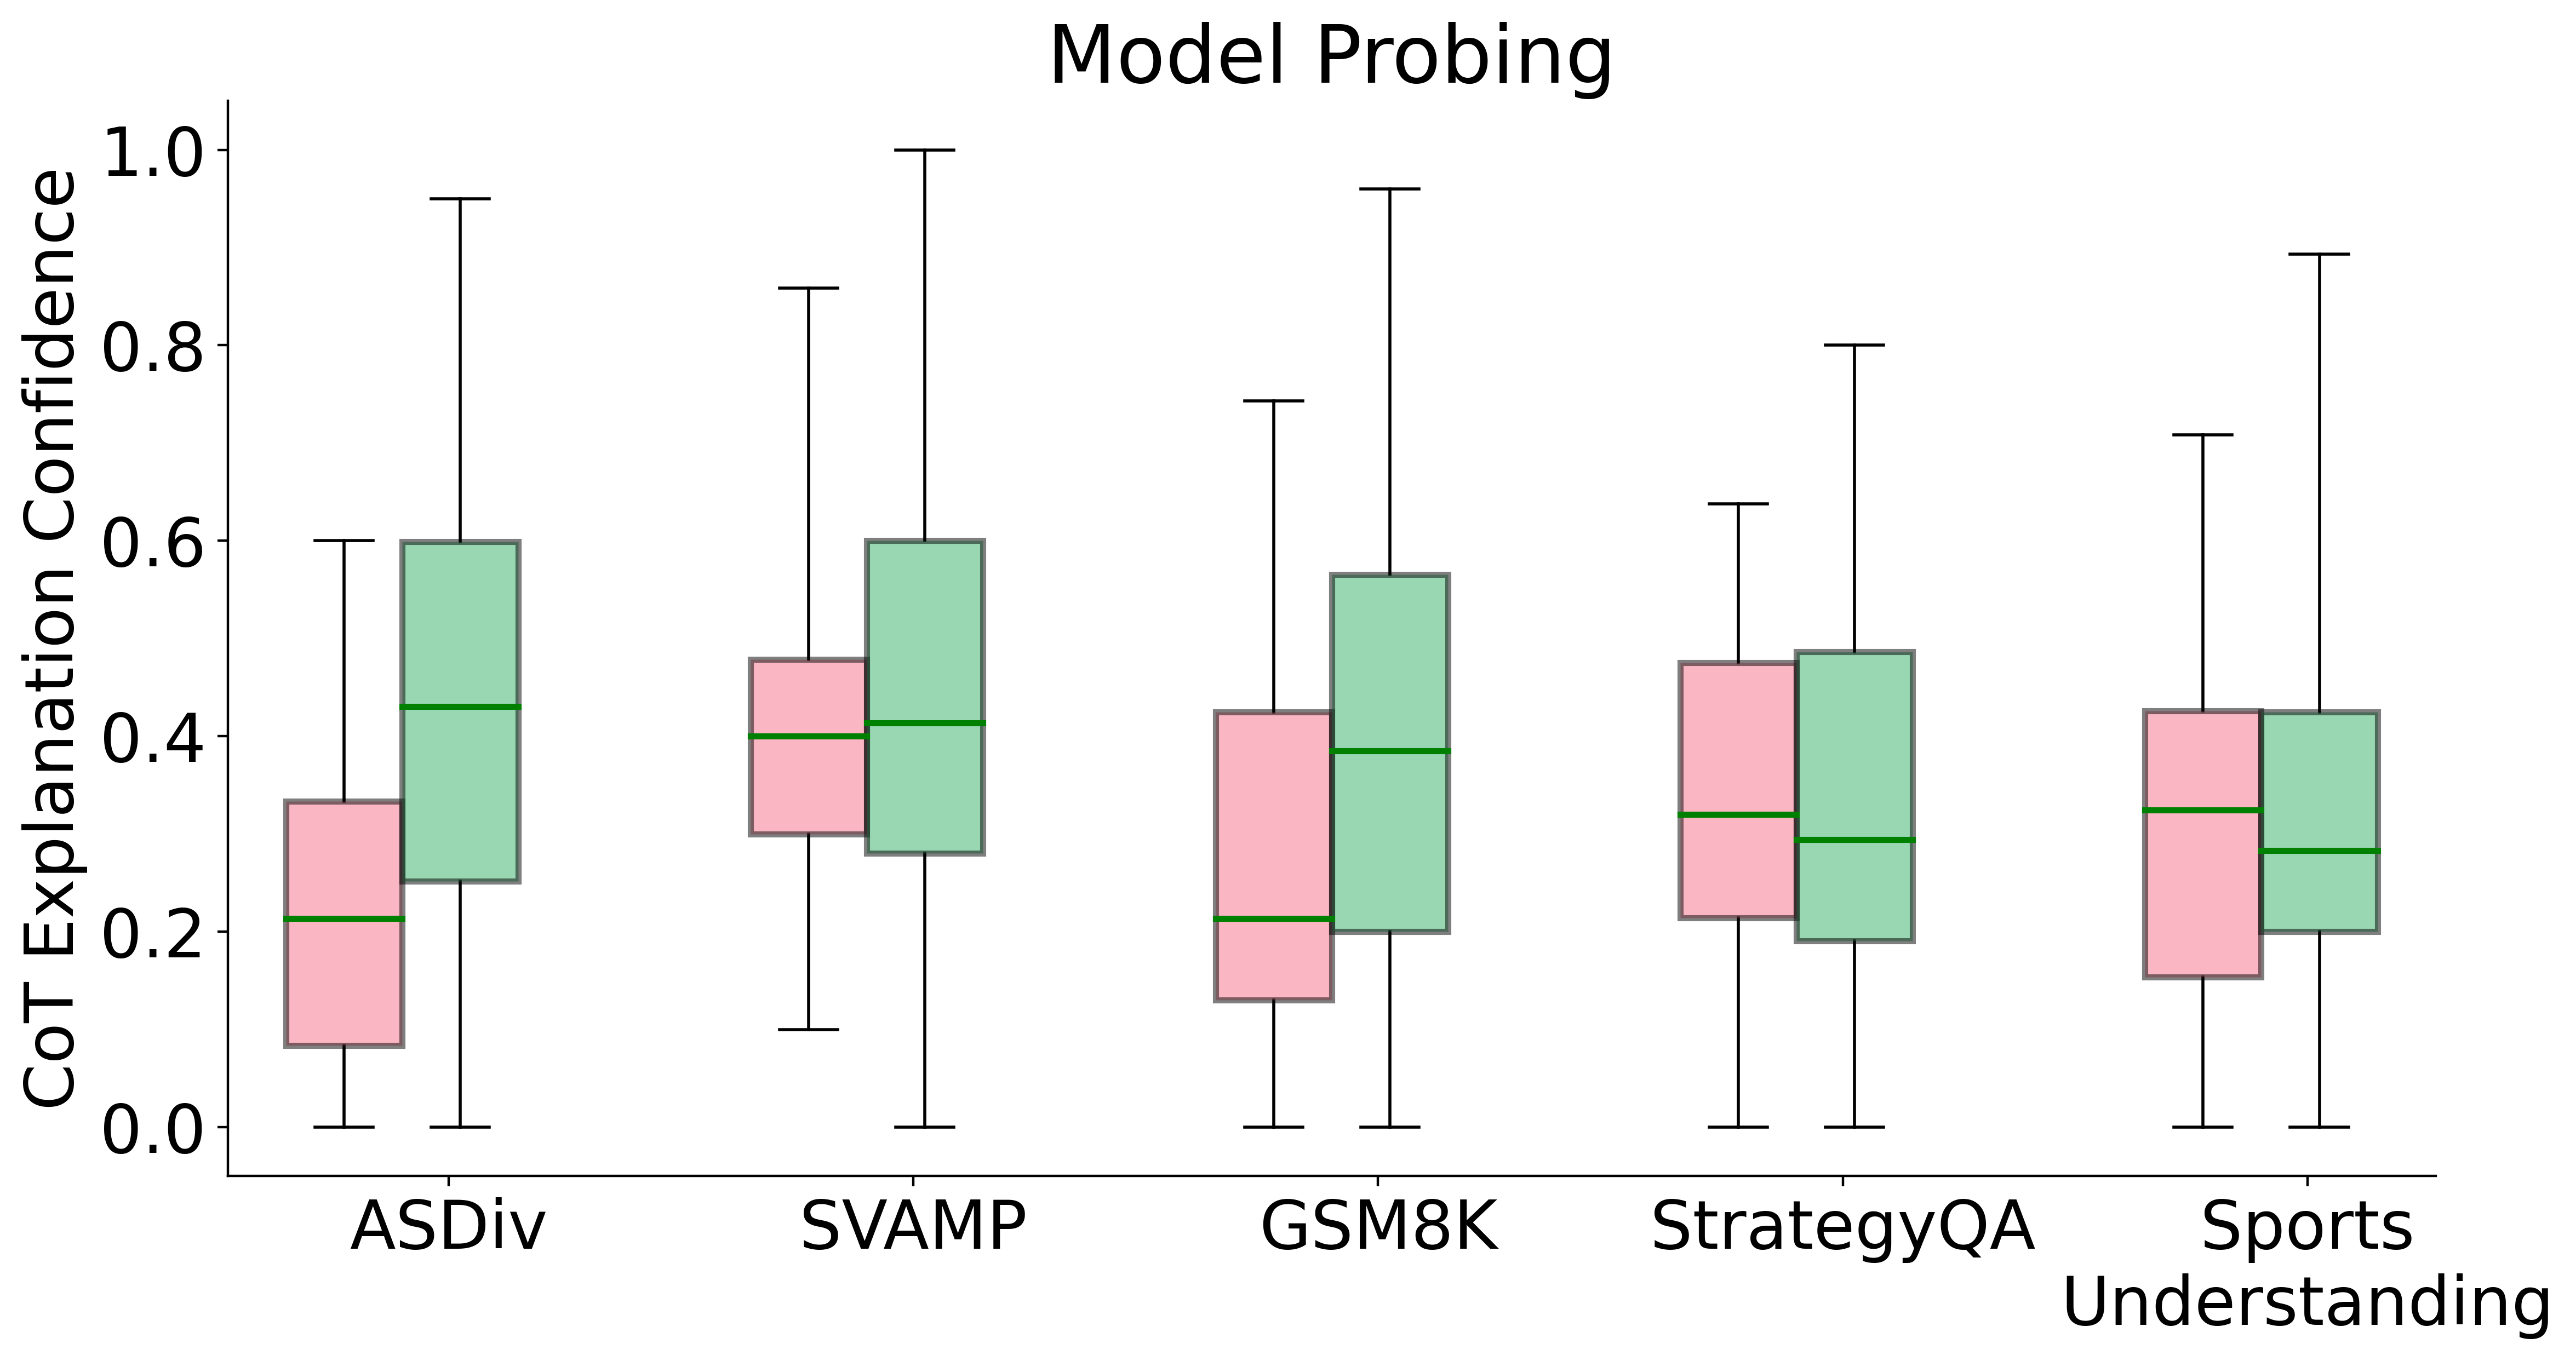

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

data_all = {
    "GSM8K": {
        "text-davinci-003": pd.read_parquet("data/gsm8k_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/gsm8k_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "SVAMP": {
        "text-davinci-003": pd.read_parquet("data/svamp_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/svamp_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "ASDiv": {
        "text-davinci-003": pd.read_parquet("data/asdiv_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/asdiv_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "Sports Understanding": {
        "text-davinci-003": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/sportsunderstanding_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
    "StrategyQA": {
        "text-davinci-003": pd.read_parquet("data/strategyqa_100/faithfulness-scores-text-davinci-003.parquet"),
        "gpt-3.5-turbo": pd.read_parquet("data/strategyqa_100/faithfulness-scores-gpt-3.5-turbo.parquet"),
    },
}

plt.rcParams.update({'font.size': 22})
plt.rc('font', family='sans-serif')
plt.rcParams["axes.grid"] = False
plt.rc('font', family='sans-serif')

boxes = []
bar_width = 0.2
categories = [*data_all.keys()]

import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(13, 6.5), dpi=400)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
boxes = []
positions = []

# Choose one dataset in ASDiv, SVAMP, GSM8K, StrategyQA, Sports Understanding
for dataset_name in ["ASDiv", "SVAMP", "GSM8K", "StrategyQA", "Sports Understanding"]:
    for label_name, column_name in [("Paraphrase", "experiment_8_score")]:
        for model_name in ["text-davinci-003"]:
            data = data_all[dataset_name][model_name]
            correct_data = data[data["correct"]==True]
            incorrect_data = data[data["correct"]==False]
            print(f"model_name: {model_name} correct: {correct_data.shape[0]} incorrect: {incorrect_data.shape[0]}")
            for data_subset_name, scores in [("wrong answers", incorrect_data[column_name]), ("correct answers", correct_data[column_name])]:
                boxes.append(
                    {
                        'whislo': scores.min(),             # Bottom whisker position
                        'q1'    : scores.quantile(0.25),    # First quartile (25th percentile)
                        'med'   : scores.quantile(0.50),    # Median         (50th percentile)
                        'mean'  : scores.mean(),            # Mean
                        'q3'    : scores.quantile(0.75),    # Third quartile (75th percentile)
                        'whishi': scores.max(),             # Top whisker position
                        'fliers': [],                      # Outliers
                })

bar_width = 0.1
incorrect_color = sns.color_palette("husl", 8)[0]  # "violet"
correct_color = sns.color_palette("husl", 8)[3]  # "magenta"
x = np.array([0, 0.5, 2, 2.5, 4, 4.5, 6, 6.5, 8, 8.5])
boxplot = ax.bxp(boxes, showfliers=True, showmeans=False, patch_artist = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(linestyle='-', linewidth=2, color='green'), positions=x + bar_width / 2)  # [0, bar_width, 3 * bar_width, 4 * bar_width, 6 * bar_width, 7 * bar_width, 9 * bar_width, 10 * bar_width], widths=[bar_width for _ in range(8)])
for box, color in zip(boxplot['boxes'], [incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color, incorrect_color, correct_color]):
    box.set(facecolor=color, alpha=0.5, linewidth=2)

    
ax.set_ylabel('CoT Explanation Confidence')
ax.set_title(f'Model Probing')


ax.set_xticks([0.5, 2.5, 4.5, 6.5, 8.5])
ax.set_xticklabels(["ASDiv", "SVAMP", "GSM8K", "StrategyQA", "Sports\nUnderstanding"])

fig.savefig(f"modelprobingaccuracycotfinal.pdf", bbox_inches='tight')